In [1]:
import json
import warnings
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import cmasher as cmr
import seaborn as sns
warnings.filterwarnings('ignore')

import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import json
import seaborn as sns
from mplsoccer import (VerticalPitch, Pitch, create_transparent_cmap,
                       FontManager, arrowhead_marker)
from matplotlib.patches import Arc
from matplotlib.offsetbox import (OffsetImage, AnnotationBbox)
import matplotlib.image as image
from matplotlib.colors import (to_rgba, LinearSegmentedColormap)
import matplotlib.patheffects as path_effects
from scipy.ndimage import gaussian_filter



from PIL import Image
from mplsoccer import Pitch, VerticalPitch, add_image

from scipy.ndimage import gaussian_filter
from matplotlib.colors import ListedColormap

from highlight_text import fig_text
from bs4 import BeautifulSoup

from mplsoccer.cm import create_transparent_cmap
from mplsoccer.scatterutils import arrowhead_marker
from mplsoccer.statsbomb import read_event, EVENT_SLUG
from mplsoccer.utils import FontManager
from matplotlib.patches import Arc

URL1 = ('https://raw.githubusercontent.com/googlefonts/SourceSerifProGFVersion/main/fonts/'
        'SourceSerifPro-Regular.ttf')
serif_regular = FontManager(URL1)
URL2 = ('https://raw.githubusercontent.com/googlefonts/SourceSerifProGFVersion/main/fonts/'
        'SourceSerifPro-ExtraLight.ttf')
serif_extra_light = FontManager(URL2)
URL3 = ('https://raw.githubusercontent.com/google/fonts/main/ofl/rubikmonoone/'
        'RubikMonoOne-Regular.ttf')
rubik_regular = FontManager(URL3)
URL4 = 'https://raw.githubusercontent.com/googlefonts/roboto/main/src/hinted/Roboto-Thin.ttf'
robotto_thin = FontManager(URL4)
URL5 = ('https://raw.githubusercontent.com/google/fonts/main/apache/robotoslab/'
        'RobotoSlab%5Bwght%5D.ttf')
robotto_bold = FontManager(URL5)

In [2]:
cHome = '#c82b20'
cAway = '#FFD432'
pHome = 'braga.png'
pAway = 'benfica.png'
comp = 'Liga Portugal 2022/2023'
stage = 'Jornada 14'
venue = ' Estádio Municipal de Braga'
date = '30/12/2022'

In [3]:
with open('SCBvsSLB.json',encoding = "utf8") as f:
    data = json.load(f)

df = pd.json_normalize(data['events'], sep = '_')

In [4]:
team_dict  = {
    data['home']['teamId']: data['home']['name'],
    data['away']['teamId']: data['away']['name']
}

player = data['home']['players'] + data['away']['players']
player_dict = {}

for i in player:
    player_dict[i['playerId']] = i['name']
    
df_player = df[df.isTouch == True]
foul_ids = df_player[df_player.playerId.isnull()].index.tolist()
df_player = df_player.drop(foul_ids)
df_player['team_name'] = df_player.teamId.apply(lambda x: team_dict[x])
df_player['player_name'] = df_player.playerId.apply(lambda x: player_dict[x])

# Toques

In [5]:
touches_df = df[df.isTouch == True]
foul_ids = touches_df[touches_df.playerId.isnull()].index.tolist()
touches_df = touches_df.drop(foul_ids)
touches_df['team_name'] = touches_df.teamId.apply(lambda x: team_dict[x])
touches_df['player_name'] = touches_df.playerId.apply(lambda x: player_dict[x])

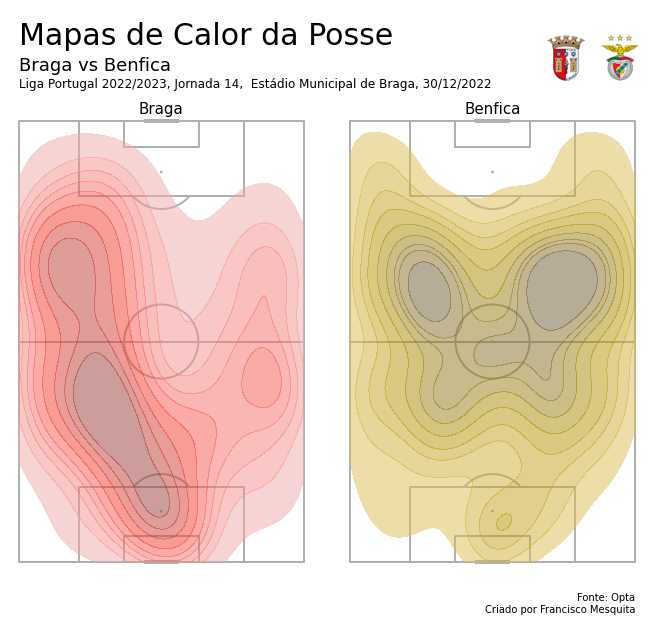

In [6]:
pitch = VerticalPitch(pitch_type = 'opta')
fig, ax = pitch.grid(ncols = 2, axis = False)
fig.set_facecolor("white")

home = touches_df[touches_df.team_name == data['home']['name']]
pitch.kdeplot(home.x, home.y, shade = True, alpha = 0.5, ax = ax['pitch'][0], color = cHome)
ax['pitch'][0].text(50, 103, data['home']['name'], va = 'center', ha = 'center', fontsize = 15, color = 'black')

away = touches_df[touches_df.team_name == data['away']['name']]
pitch.kdeplot(away.x, away.y, shade = True, alpha = 0.5, ax = ax['pitch'][1], color = cAway)
ax['pitch'][1].text(50, 103, data['away']['name'], va = 'center', ha = 'center', fontsize = 15, color = 'black')

ax['title'].text(0, 0.7, 'Mapas de Calor da Posse', va = 'center', ha = 'left', fontsize = 30, color = 'black')
ax['title'].text(0, 0.4, data['home']['name'] + ' vs ' + data['away']['name'], 
                 va = 'center', ha = 'left', fontsize = 18, color = 'black')
ax['title'].text(0, 0.2, comp + ', ' + stage + ', ' + venue + ', ' + date, 
                 va = 'center', ha = 'left', fontsize = 12, color = 'black')

add_image(Image.open(pHome), fig, 
          left = 0.82, bottom = 0.86, width = 0.07, height = 0.07)
add_image(Image.open(pAway), fig, 
          left = 0.9, bottom = 0.86, width = 0.07, height = 0.07)

ax['endnote'].text(1, 0.6, 'Fonte: Opta', va = 'center', ha = 'right', color = 'black')
ax['endnote'].text(1, 0.3, 'Criado por Francisco Mesquita', va = 'center', ha = 'right', color = 'black')

plt.show()

(-0.5, 69.5, 69.5, -0.5)

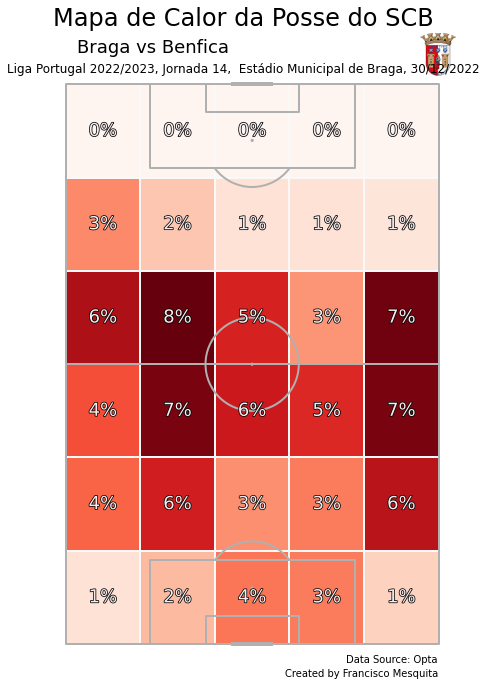

In [7]:
plt.rcParams["figure.figsize"] = [5.00, 1.50]
plt.rcParams["figure.autolayout"] = True

# path effects
path_eff = [path_effects.Stroke(linewidth = 1.5, foreground = 'black'),
            path_effects.Normal()]

pitch = VerticalPitch(pitch_type = 'statsbomb', line_zorder = 2, pitch_color = 'white')
fig, ax = pitch.draw(figsize = (6, 10))
fig.set_facecolor("white")

#city = touches_df[touches_df.team_name == data['home']['name']]
city = touches_df[touches_df.team_name == data['away']['name']]
bin_statistic = pitch.bin_statistic(city.x, city.y, statistic = 'count', bins = (6, 5), normalize = True)
pitch.heatmap(bin_statistic, ax = ax, cmap = 'Reds', edgecolor = '#f9f9f9')
labels = pitch.label_heatmap(bin_statistic, color = '#f4edf0', fontsize = 18,
                             ax = ax, ha = 'center', va = 'center',
                             str_format = '{:.0%}', path_effects = path_eff)

title1 = fig.text(x = 0.48, y = .98, s = 'Mapa de Calor da Posse do SCB', va = 'center', ha = 'center',
                  size = 24, color = 'black')
title2 = fig.text(x = 0.27, y = .94, s = data['home']['name'] + ' vs ' + data['away']['name'], va = 'center', ha = 'center',
                  size = 18, color = 'black')
title3 = fig.text(x = 0.48, y = .91, s = comp + ', ' + stage + ', ' + venue + ', ' + date, va = 'center', ha = 'center',
                  size = 12, color = 'black')

legend1 = fig.text(.93, 0.09, 'Data Source: Opta', va = 'center', ha = 'right')
legend2 = fig.text(.93, 0.07, 'Created by Francisco Mesquita', va = 'center', ha = 'right')

imHD = plt.imread(pHome) # insert local path of the image.
newaxHD = fig.add_axes([0.88, 0.9, 0.1, 0.06], anchor= 'NE', zorder = 1)
newaxHD.imshow(imHD)
newaxHD.axis('off')

(-0.5, 69.5, 69.5, -0.5)

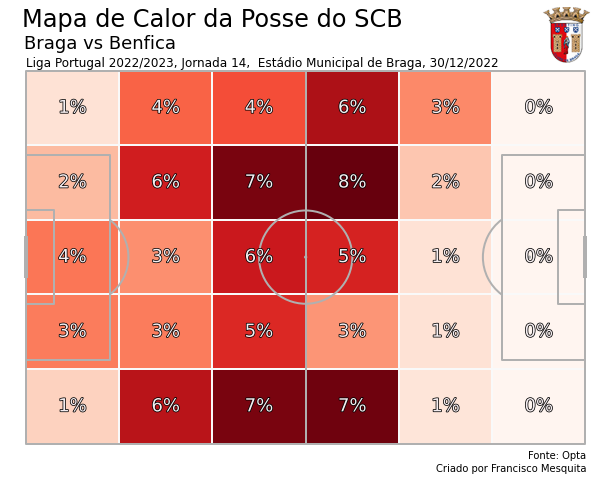

In [8]:
plt.rcParams["figure.figsize"] = [5.00, 1.50]
plt.rcParams["figure.autolayout"] = True

# path effects
path_eff = [path_effects.Stroke(linewidth = 1.5, foreground = 'black'),
            path_effects.Normal()]

pitch = Pitch(pitch_type = 'statsbomb', line_zorder = 2, pitch_color = 'white')
fig, ax = pitch.draw(figsize = (10, 6))
fig.set_facecolor("white")

#city = touches_df[touches_df.team_name == data['home']['name']]
city = touches_df[touches_df.team_name == data['away']['name']]
bin_statistic = pitch.bin_statistic(city.x, city.y, statistic = 'count', bins = (6, 5), normalize = True)
pitch.heatmap(bin_statistic, ax = ax, cmap = 'Reds', edgecolor = '#f9f9f9')
labels = pitch.label_heatmap(bin_statistic, color = '#f4edf0', fontsize = 18,
                             ax = ax, ha = 'center', va = 'center',
                             str_format = '{:.0%}', path_effects = path_eff)

title1 = fig.text(x = 0.37, y = 1.05, s = 'Mapa de Calor da Posse do SCB', va = 'center', ha = 'center',
                  size = 24, color = 'black')
title2 = fig.text(x = 0.215, y = .995, s = data['home']['name'] + ' vs ' + data['away']['name'], va = 'center', ha = 'center',
                  size = 18, color = 'black')
title3 = fig.text(x = 0.44, y = .95, s = comp + ', ' + stage + ', ' + venue + ', ' + date, va = 'center', ha = 'center',
                  size = 12, color = 'black')

legend1 = fig.text(.89, 0.04, 'Fonte: Opta', va = 'center', ha = 'right')
legend2 = fig.text(.89, 0.01, 'Criado por Francisco Mesquita', va = 'center', ha = 'right')

imHD = plt.imread(pHome) # insert local path of the image.
newaxHD = fig.add_axes([0.8, 0.95, 0.1, 0.13], anchor= 'NE', zorder = 1)
newaxHD.imshow(imHD)
newaxHD.axis('off')

# Passe

In [9]:
pass_data = df[df.type_displayName == 'Pass'].reset_index()
pass_data['team_name'] = pass_data.teamId.apply(lambda x: team_dict[x])
pass_data['player_name'] = pass_data.playerId.apply(lambda x: player_dict[x])

def is_atk_third(data):
    if data.endX > 66.6 and data.x <= 66.6:
        return True
    else:
        return False

def at_atk_third(data):
    if data.x > 66.6 and data.endX > 66.6:
        return True
    else:
        return False

pass_data['to_atk_third'] = pass_data.apply(lambda x: is_atk_third(x), axis=1)
pass_data['at_atk_third'] = pass_data.apply(lambda x: at_atk_third(x), axis=1)

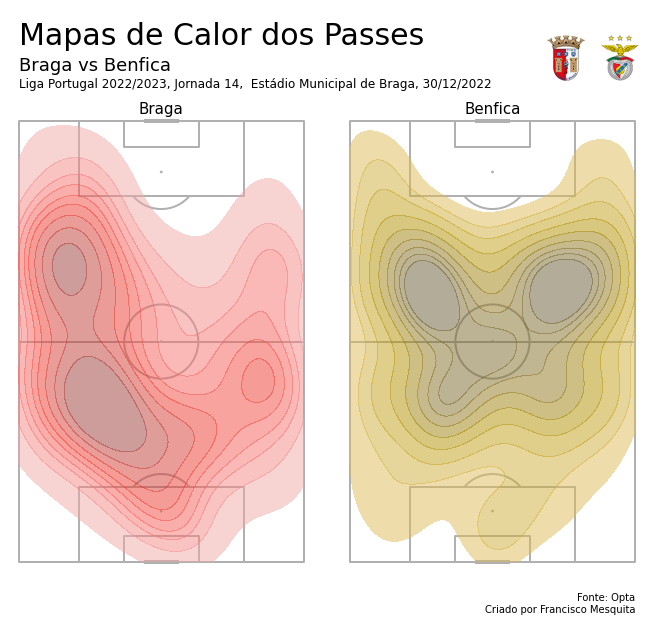

In [10]:
pitch = VerticalPitch(pitch_type = 'opta')
fig, ax = pitch.grid(ncols = 2, axis = False)
fig.set_facecolor("white")

home = pass_data[pass_data.team_name == data['home']['name']]
pitch.kdeplot(home.x, home.y, shade = True, alpha = 0.5, ax = ax['pitch'][0], color = cHome)
ax['pitch'][0].text(50, 103, data['home']['name'], va = 'center', ha = 'center', fontsize = 15, color = 'black')

away = pass_data[pass_data.team_name == data['away']['name']]
pitch.kdeplot(away.x, away.y, shade = True, alpha = 0.5, ax = ax['pitch'][1], color = cAway)
ax['pitch'][1].text(50, 103, data['away']['name'], va = 'center', ha = 'center', fontsize = 15, color = 'black')

ax['title'].text(0, 0.7, 'Mapas de Calor dos Passes', va = 'center', ha = 'left', fontsize = 30, color = 'black')
ax['title'].text(0, 0.4, data['home']['name'] + ' vs ' + data['away']['name'], 
                 va = 'center', ha = 'left', fontsize = 18, color = 'black')
ax['title'].text(0, 0.2, comp + ', ' + stage + ', ' + venue + ', ' + date, 
                 va = 'center', ha = 'left', fontsize = 12, color = 'black')

add_image(Image.open(pHome), fig, 
          left = 0.82, bottom = 0.86, width = 0.07, height = 0.07)
add_image(Image.open(pAway), fig, 
          left = 0.9, bottom = 0.86, width = 0.07, height = 0.07)

ax['endnote'].text(1, 0.6, 'Fonte: Opta', va = 'center', ha = 'right', color = 'black')
ax['endnote'].text(1, 0.3, 'Criado por Francisco Mesquita', va = 'center', ha = 'right', color = 'black')

plt.show()

(-0.5, 69.5, 69.5, -0.5)

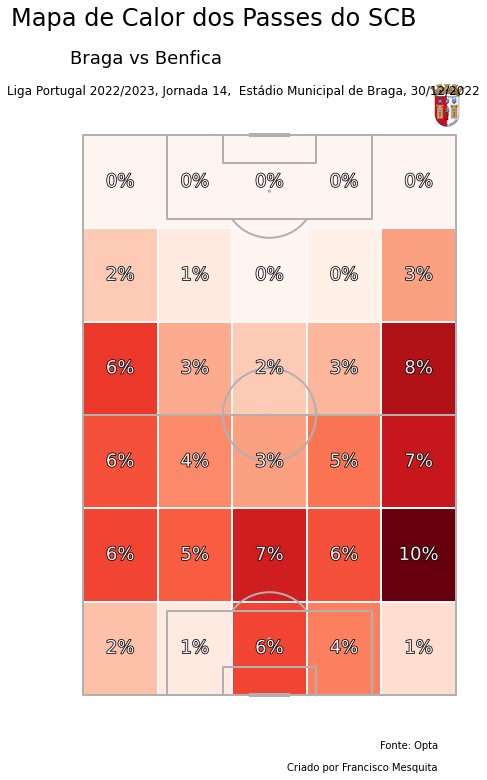

In [11]:
plt.rcParams["figure.figsize"] = [5.00, 1.50]
plt.rcParams["figure.autolayout"] = True

# path effects
path_eff = [path_effects.Stroke(linewidth = 1.5, foreground = 'black'),
            path_effects.Normal()]

home = pass_data[pass_data.team_name == data['home']['name']]
#away = pass_data[pass_data.team_name == data['away']['name']]

pitch = VerticalPitch(pitch_type = 'statsbomb', line_zorder = 2, pitch_color = 'white')
fig, ax = pitch.draw(figsize = (6, 10))
fig.set_facecolor("white")
bin_statistic = pitch.bin_statistic(home.x, home.y, statistic = 'count', bins = (6, 5), normalize = True)
pitch.heatmap(bin_statistic, ax = ax, cmap = 'Reds', edgecolor = '#f9f9f9')
labels = pitch.label_heatmap(bin_statistic, color = '#f4edf0', fontsize = 18,
                             ax = ax, ha = 'center', va = 'center',
                             str_format = '{:.0%}', path_effects = path_eff)

title1 = fig.text(x = 0.37, y = 1.05, s = 'Mapa de Calor dos Passes do SCB', va = 'center', ha = 'center',
                  size = 24, color = 'black')
title2 = fig.text(x = 0.215, y = .995, s = data['home']['name'] + ' vs ' + data['away']['name'], va = 'center', ha = 'center',
                  size = 18, color = 'black')
title3 = fig.text(x = 0.44, y = .95, s = comp + ', ' + stage + ', ' + venue + ', ' + date, va = 'center', ha = 'center',
                  size = 12, color = 'black')

legend1 = fig.text(.89, 0.04, 'Fonte: Opta', va = 'center', ha = 'right')
legend2 = fig.text(.89, 0.01, 'Criado por Francisco Mesquita', va = 'center', ha = 'right')

imHD = plt.imread(pHome) # insert local path of the image.
newaxHD = fig.add_axes([0.86, 0.9, 0.1, 0.06], anchor= 'NE', zorder = 1)
newaxHD.imshow(imHD)
newaxHD.axis('off')

(-0.5, 69.5, 69.5, -0.5)

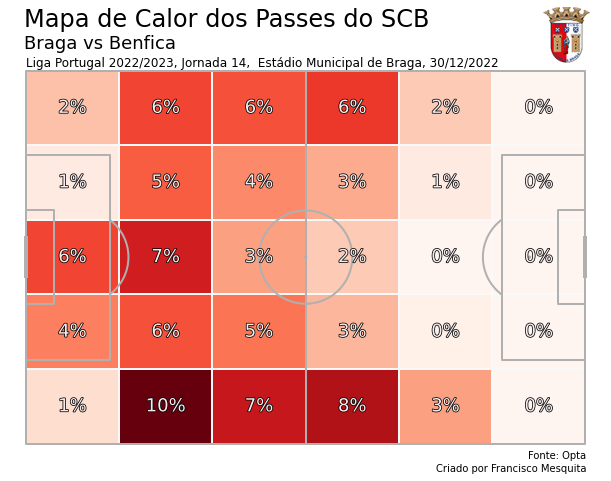

In [12]:
plt.rcParams["figure.figsize"] = [5.00, 1.50]
plt.rcParams["figure.autolayout"] = True

# path effects
path_eff = [path_effects.Stroke(linewidth = 1.5, foreground = 'black'),
            path_effects.Normal()]

home = pass_data[pass_data.team_name == data['home']['name']]
#away = pass_data[pass_data.team_name == data['away']['name']]

pitch = Pitch(pitch_type = 'statsbomb', line_zorder = 2, pitch_color = 'white')
fig, ax = pitch.draw(figsize = (10, 6))
fig.set_facecolor("white")
bin_statistic = pitch.bin_statistic(home.x, home.y, statistic = 'count', bins = (6, 5), normalize = True)
pitch.heatmap(bin_statistic, ax = ax, cmap = 'Reds', edgecolor = '#f9f9f9')
labels = pitch.label_heatmap(bin_statistic, color = '#f4edf0', fontsize = 18,
                             ax = ax, ha = 'center', va = 'center',
                             str_format = '{:.0%}', path_effects = path_eff)

title1 = fig.text(x = 0.39, y = 1.05, s = 'Mapa de Calor dos Passes do SCB', va = 'center', ha = 'center',
                  size = 24, color = 'black')
title2 = fig.text(x = 0.215, y = .995, s = data['home']['name'] + ' vs ' + data['away']['name'], va = 'center', ha = 'center',
                  size = 18, color = 'black')
title3 = fig.text(x = 0.44, y = .95, s = comp + ', ' + stage + ', ' + venue + ', ' + date, va = 'center', ha = 'center',
                  size = 12, color = 'black')

legend1 = fig.text(.89, 0.04, 'Fonte: Opta', va = 'center', ha = 'right')
legend2 = fig.text(.89, 0.01, 'Criado por Francisco Mesquita', va = 'center', ha = 'right')

imHD = plt.imread(pHome) # insert local path of the image.
newaxHD = fig.add_axes([0.8, 0.95, 0.1, 0.13], anchor= 'NE', zorder = 1)
newaxHD.imshow(imHD)
newaxHD.axis('off')

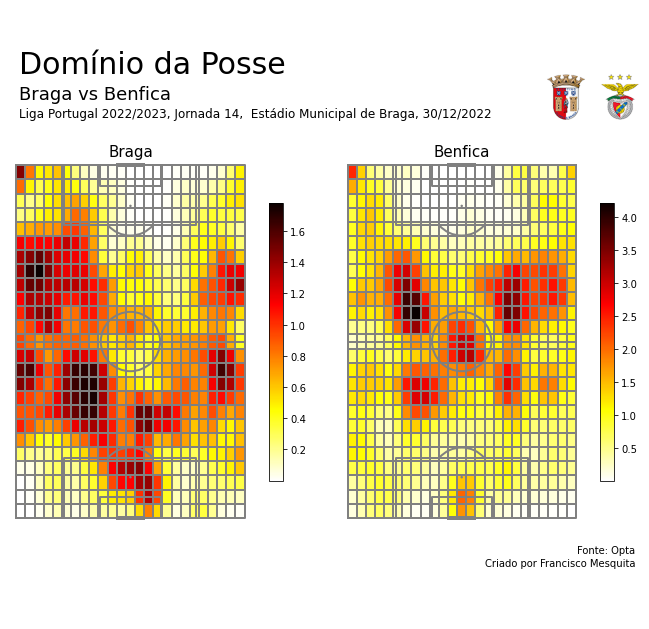

In [13]:
#cmap = ListedColormap(['white', '#', '#FC5C00','#FC3200', '#FC0000'])

pitch = VerticalPitch(pitch_type = 'opta', line_color = 'gray')
fig, ax = pitch.grid(ncols = 2, axis = False)
fig.set_facecolor("white")

# Home Team
home = pass_data[pass_data.team_name == data['home']['name']]
bin_statistic = pitch.bin_statistic(home.x, home.y, statistic = 'count', bins = (25, 25))#, normalize = True)
bin_statistic['statistic'] = gaussian_filter(bin_statistic['statistic'], 1)

hm = pitch.heatmap(bin_statistic, ax = ax['pitch'][0], cmap = 'hot_r', edgecolors = 'gray', zorder = 0)
cbar = fig.colorbar(hm, ax = ax['pitch'][0], shrink = 0.6)
ax['pitch'][0].text(50, 104, data['home']['name'], va = 'center', ha = 'center', fontsize = 15, color = 'black')

# Away Team
away = pass_data[pass_data.team_name == data['away']['name']]
bin_statistic = pitch.bin_statistic(away.x, away.y, statistic = 'count', bins = (25, 25))#, normalize = True)
bin_statistic['statistic'] = gaussian_filter(bin_statistic['statistic'], 1)

am = pitch.heatmap(bin_statistic, ax = ax['pitch'][1], cmap = 'hot_r', edgecolors = 'gray', zorder = 0)
cbar = fig.colorbar(am, ax = ax['pitch'][1], shrink = 0.6)
ax['pitch'][1].text(50, 104, data['away']['name'], va = 'center', ha = 'center', fontsize = 15, color = 'black')

ax['title'].text(0, 0.4, 'Domínio da Posse', va = 'center', ha = 'left', fontsize = 30, color = 'black')
ax['title'].text(0, 0.1, data['home']['name'] + ' vs ' + data['away']['name'], 
                 va = 'center', ha = 'left', fontsize = 18, color = 'black')
ax['title'].text(0, -0.1, comp + ', ' + stage + ', ' + venue + ', ' + date, 
                 va = 'center', ha = 'left', fontsize = 12, color = 'black')

# Home
add_image(Image.open(pHome), fig, 
          left = 0.82, bottom = 0.8, width = 0.07, height = 0.07)
# Away
add_image(Image.open(pAway), fig, 
          left = 0.9, bottom = 0.8, width = 0.07, height = 0.07)

ax['endnote'].text(1, 1.7, 'Fonte: Opta', va = 'center', ha = 'right', color = 'black')
ax['endnote'].text(1, 1.4, 'Criado por Francisco Mesquita', va = 'center', ha = 'right', color = 'black')

plt.show()

Braga had 52 Passes to the Attacking 3rd
Benfica had 73 Passes to the Attacking 3rd


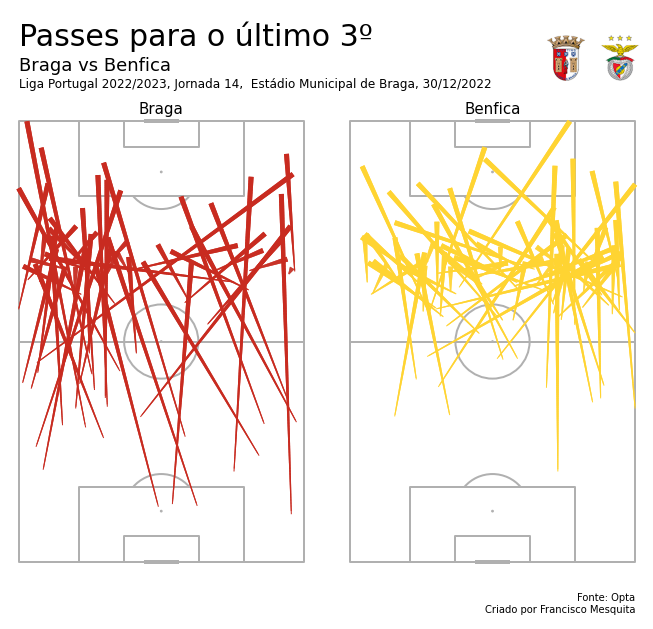

In [14]:
pitch = VerticalPitch(pitch_type = 'opta', half = False)
fig, ax = pitch.grid(ncols = 2, axis = False)
fig.set_facecolor("white")

pass_atk = pass_data[pass_data.to_atk_third == True]

home = pass_atk[pass_atk.team_name == data['home']['name']]
home_Total = home[home.columns[0]].count()
print(data['home']['name'] + ' had ' + str(home_Total) + ' Passes to the Attacking 3rd')
pitch.lines(home.x, home.y, home.endX, home.endY, comet = True, ax = ax['pitch'][0], color = cHome)
ax['pitch'][0].text(50, 103, data['home']['name'], fontsize = 15, va = 'center', ha = 'center', color = 'black')

away = pass_atk[pass_atk.team_name == data['away']['name']]
away_Total = away[away.columns[0]].count()
print(data['away']['name'] + ' had ' + str(away_Total) + ' Passes to the Attacking 3rd')
pitch.lines(away.x, away.y, away.endX, away.endY, comet = True, ax = ax['pitch'][1], color = cAway)
ax['pitch'][1].text(50, 103, data['away']['name'], fontsize = 15, va = 'center', ha = 'center', color = 'black')

ax['title'].text(0, 0.7, 'Passes para o último 3º', va = 'center', ha = 'left', fontsize = 30, color = 'black')
ax['title'].text(0, 0.4, data['home']['name'] + ' vs ' + data['away']['name'], 
                 va = 'center', ha = 'left', fontsize = 18, color = 'black')
ax['title'].text(0, 0.2, comp + ', ' + stage + ', ' + venue + ', ' + date, 
                 va = 'center', ha = 'left', fontsize = 12, color = 'black')

add_image(Image.open(pHome), fig, 
          left = 0.82, bottom = 0.86, width = 0.07, height = 0.07)
add_image(Image.open(pAway), fig, 
          left = 0.9, bottom = 0.86, width = 0.07, height = 0.07)

ax['endnote'].text(1, 0.6, 'Fonte: Opta', va = 'center', ha = 'right', color = 'black')
ax['endnote'].text(1, 0.3, 'Criado por Francisco Mesquita', va = 'center', ha = 'right', color = 'black')

plt.show()

# Posição Média

In [15]:
avg_pos = pass_data[['team_name', 'player_name', 'minute', 'x', 'y', 'endX', 'endY']].groupby(
    ['team_name', 'player_name']).agg({'minute': [np.max, np.min], 'x': np.mean, 'y': np.mean}).reset_index().reset_index()
avg_pos.columns = [' '.join(col).strip() for col in avg_pos.columns.values]
avg_pos['mins_played'] = avg_pos['minute amax'] - avg_pos['minute amin']

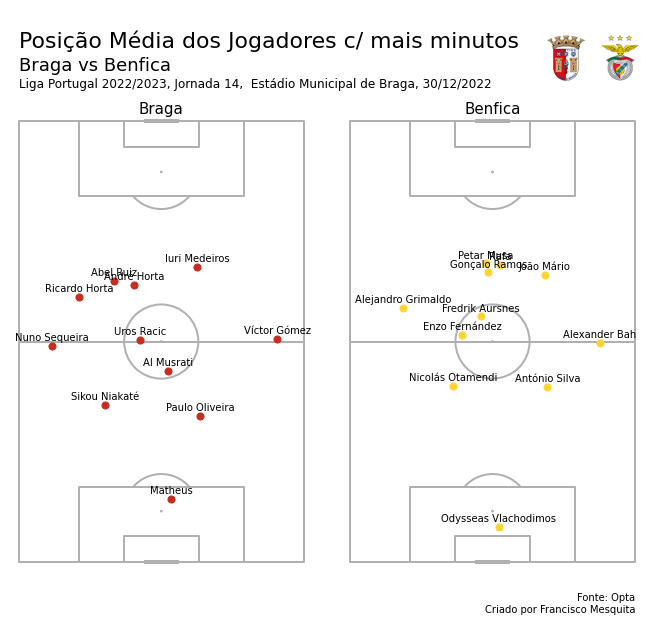

In [16]:
pitch = VerticalPitch(pitch_type = 'opta')
fig, ax = pitch.grid(ncols = 2, axis = False)
fig.set_facecolor("white")

home = avg_pos[avg_pos.team_name == data['home']['name']]
home = home.sort_values('mins_played', ascending = False).iloc[:11, :]
pitch.scatter(home['x mean'], home['y mean'], s = 50, ax = ax['pitch'][0], color = cHome)
ax['pitch'][0].text(50, 103, data['home']['name'], va = 'center', ha = 'center', fontsize = 15, color = 'black')

for i, d in home.iterrows():
    pitch.annotate(d['player_name'], (d['x mean'] + 2, d['y mean']), 
                   va = 'center', ha = 'center', ax = ax['pitch'][0], color = 'black')

away = avg_pos[avg_pos.team_name == data['away']['name']]
away = away.sort_values('mins_played', ascending = False).iloc[:11, :]
pitch.scatter(away['x mean'], away['y mean'], s = 50, ax = ax['pitch'][1], color = cAway)
ax['pitch'][1].text(50, 103, data['away']['name'], va = 'center', ha = 'center', fontsize = 15, color = 'black')

for i, d in away.iterrows():
    pitch.annotate(d['player_name'], (d['x mean'] + 2, d['y mean']), 
                   va = 'center', ha = 'center', ax = ax['pitch'][1], color = 'black')

ax['title'].text(0, 0.65, 'Posição Média dos Jogadores c/ mais minutos', va = 'center', ha = 'left', fontsize = 22, color = 'black')
ax['title'].text(0, 0.4, data['home']['name'] + ' vs ' + data['away']['name'], 
                 va = 'center', ha = 'left', fontsize = 18, color = 'black')
ax['title'].text(0, 0.2, comp + ', ' + stage + ', ' + venue + ', ' + date, 
                 va = 'center', ha = 'left', fontsize = 12, color = 'black')

add_image(Image.open(pHome), fig, 
          left = 0.82, bottom = 0.86, width = 0.07, height = 0.07)
add_image(Image.open(pAway), fig, 
          left = 0.9, bottom = 0.86, width = 0.07, height = 0.07)

ax['endnote'].text(1, 0.6, 'Fonte: Opta', va = 'center', ha = 'right', color = 'black')
ax['endnote'].text(1, 0.3, 'Criado por Francisco Mesquita', va = 'center', ha = 'right', color = 'black')

plt.show()

# Rede de Passes

In [17]:
team = pass_data.team_name.values.tolist()
passer = pass_data.player_name.values.tolist()
receiver = pass_data.player_name.shift(-1).tolist()
team_receiver = pass_data.team_name.shift(-1).tolist()
pass_outcome = pass_data.outcomeType_displayName.values.tolist()
x = pass_data.x.values.tolist()
y = pass_data.y.values.tolist()

pass_net_df = pd.DataFrame({
    'team': team,
    'team_receiver': team_receiver,
    'passer': passer,
    'receiver': receiver,
    'pass_outcome': pass_outcome,
    'x': x,
    'y': y
})

pass_net_df = pass_net_df[pass_net_df.pass_outcome == 'Successful']
pass_net_df = pass_net_df[pass_net_df.team == pass_net_df.team_receiver]
pass_net_df['id'] = pass_net_df['passer'] + pass_net_df['receiver']

pass_pair_df = pass_net_df[['passer', 'receiver', 'pass_outcome']].groupby(['passer', 'receiver']).count().reset_index()
pass_pair_df['id'] = pass_pair_df['passer'] + pass_pair_df['receiver']
pass_pair_df = pass_pair_df.sort_values('pass_outcome', ascending = False)

# Retrieve Top 11 Players
top_11_home = avg_pos[avg_pos.team_name == data['home']['name']].sort_values('mins_played', 
                ascending = False).player_name.tolist()[:11]
top_11_away = avg_pos[avg_pos.team_name == data['away']['name']].sort_values('mins_played', 
                ascending = False).player_name.tolist()[:11]

# Filter the data
avg_pos_11 = avg_pos[avg_pos.player_name.isin(top_11_home + top_11_away)].reset_index(drop = True)
avg_pos_11 = avg_pos_11.drop(['index', 'minute amax', 'minute amin', 'mins_played'], axis = 1)

pass_merge = pass_pair_df.merge(avg_pos_11, left_on = 'passer', right_on = 'player_name',)
pass_merge = pass_merge.rename({'x mean': 'x', 'y mean': 'y'}, axis = 'columns')
pass_merge = pass_merge.merge(avg_pos_11, left_on = 'receiver', right_on = 'player_name',)
pass_merge = pass_merge.rename({'x mean': 'x_end', 'y mean': 'y_end'}, axis = 'columns')
pass_merge = pass_merge.drop(['player_name_x', 'team_name_y', 'id', 'player_name_y'], axis = 1)
pass_merge = pass_merge.rename({'team_name_x': 'team_name'}, axis = 'columns')

In [18]:
pass_pair_df.head(20)

,passer,receiver,pass_outcome,id
151,Nicolás Otamendi,Enzo Fernández,26,Nicolás OtamendiEnzo Fernández
67,Enzo Fernández,Fredrik Aursnes,19,Enzo FernándezFredrik Aursnes
56,António Silva,Nicolás Otamendi,18,António SilvaNicolás Otamendi
89,Fredrik Aursnes,Enzo Fernández,17,Fredrik AursnesEnzo Fernández
153,Nicolás Otamendi,Fredrik Aursnes,15,Nicolás OtamendiFredrik Aursnes
30,Alexander Bah,António Silva,14,Alexander BahAntónio Silva
26,Alejandro Grimaldo,Nicolás Otamendi,14,Alejandro GrimaldoNicolás Otamendi
176,Odysseas Vlachodimos,Nicolás Otamendi,13,Odysseas VlachodimosNicolás Otamendi
65,Enzo Fernández,António Silva,13,Enzo FernándezAntónio Silva
48,António Silva,Alexander Bah,12,António SilvaAlexander Bah


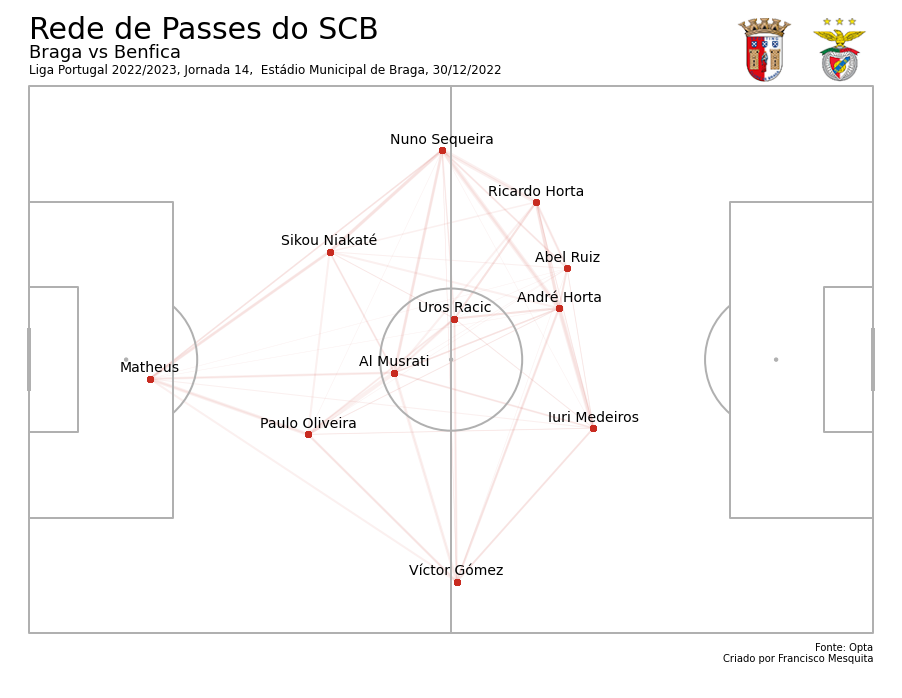

In [19]:
pitch = Pitch(pitch_type = 'opta')

fig, ax = pitch.grid(figheight = 10, title_height = 0.08, endnote_space = 0, axis = False, 
                      title_space = 0, grid_height = 0.82, endnote_height = 0.05)

fig.set_facecolor("white")

home = pass_merge[pass_merge.team_name == data['home']['name']]
#away = pass_merge[pass_merge.team_name == data['away']['name']]

pitch.lines(home.x, home.y, home.x_end, home.y_end, color = cHome, 
            linewidth = home.pass_outcome * 0.5, alpha = 0.07, 
            zorder = 0, ax = ax['pitch'])
pitch.scatter(home.x, home.y, color = cHome, ax = ax['pitch'])

for i, d in home[['passer', 'x', 'y']].drop_duplicates().iterrows():
    pitch.annotate(d.passer, (d.x, d.y + 2.), ax = ax['pitch'], va = 'center', ha = 'center', size = 14, color = 'black')

ax['title'].text(0, 0.6, 'Rede de Passes do SCB', va = 'center', ha = 'left', fontsize = 30, color = 'black')
ax['title'].text(0, 0.2, data['home']['name'] + ' vs ' + data['away']['name'], 
                 va = 'center', ha = 'left', fontsize = 18, color = 'black')
ax['title'].text(0, -0.1, comp + ', ' + stage + ', ' + venue + ', ' + date, 
                 va = 'center', ha ='left', fontsize = 12, color = 'black')

add_image(Image.open(pHome), fig, 
          left = 0.8, bottom = 0.87, width = 0.07, height = 0.09)
add_image(Image.open(pAway), fig, 
          left = 0.88, bottom = 0.87, width = 0.07, height = 0.09)

ax['endnote'].text(1, 1.2, 'Fonte: Opta', va = 'center', ha = 'right', color = 'black')
ax['endnote'].text(1, 0.9, 'Criado por Francisco Mesquita', va = 'center', ha = 'right', color = 'black')

plt.show()

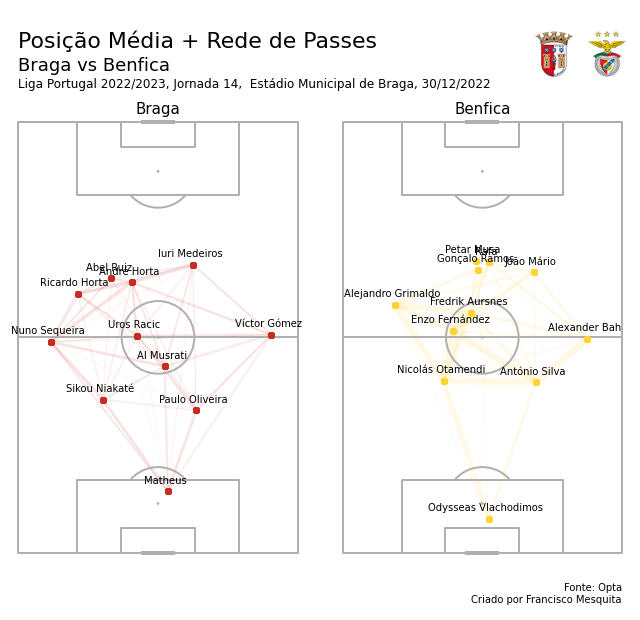

In [88]:
 pitch = VerticalPitch(pitch_type = 'opta')
fig, ax = pitch.grid(ncols = 2, axis = False, grid_height = .7)
fig.set_facecolor("white")


home = pass_merge[pass_merge.team_name == data['home']['name']]
away = pass_merge[pass_merge.team_name == data['away']['name']]

pitch.lines(home.x, home.y, home.x_end, home.y_end, color = cHome, 
            linewidth = home.pass_outcome * 0.5, alpha = 0.07, 
            zorder = 0, ax = ax['pitch'][0])
pitch.scatter(home.x, home.y, color = cHome, ax = ax['pitch'][0])
ax['pitch'][0].text(50, 103, data['home']['name'], va = 'center', ha = 'center', fontsize = 15, color = 'black')

pitch.lines(away.x, away.y, away.x_end, away.y_end, color = cAway, 
            linewidth = away.pass_outcome * 0.5, alpha = 0.07, 
            zorder = 0, ax = ax['pitch'][1])
pitch.scatter(away.x, away.y, color = cAway, ax = ax['pitch'][1])
ax['pitch'][1].text(50, 103, data['away']['name'], va = 'center', ha = 'center', fontsize = 15, color = 'black')

for i, d in home[['passer', 'x', 'y']].drop_duplicates().iterrows():
    pitch.annotate(d.passer, (d.x + 2.5, d.y + 1), ax = ax['pitch'][0], 
                   va = 'center', ha = 'center', size = 10, color = 'black')
for i, d in away[['passer', 'x', 'y']].drop_duplicates().iterrows():
    pitch.annotate(d.passer, (d.x + 2.5, d.y + 1), ax = ax['pitch'][1], 
                   va = 'center', ha = 'center', size = 10, color = 'black')

ax['title'].text(0, 0.65, 'Posição Média + Rede de Passes', va = 'center', ha = 'left', fontsize = 22, color = 'black')
ax['title'].text(0, 0.4, data['home']['name'] + ' vs ' + data['away']['name'], 
                 va = 'center', ha = 'left', fontsize = 18, color = 'black')
ax['title'].text(0, 0.2, comp + ', ' + stage + ', ' + venue + ', ' + date, 
                 va = 'center', ha = 'left', fontsize = 12, color = 'black')

add_image(Image.open(pHome), fig, 
          left = 0.82, bottom = 0.86, width = 0.07, height = 0.07)
add_image(Image.open(pAway), fig, 
          left = 0.9, bottom = 0.86, width = 0.07, height = 0.07)

ax['endnote'].text(1, 0.6, 'Fonte: Opta', va = 'center', ha = 'right', color = 'black')
ax['endnote'].text(1, 0.3, 'Criado por Francisco Mesquita', va = 'center', ha = 'right', color = 'black')

plt.show()

# Passes Progressivos

In [21]:
pass_data['begin'] = pass_data.apply(lambda x: np.sqrt((100 - x['x']) ** 2 + (50 - x['y'])), axis = 1)
pass_data['end'] = pass_data.apply(lambda x: np.sqrt((100 - x['endX']) ** 2 + (50 - x['endY'])), axis = 1)
pass_data['progressive'] = pass_data.apply(lambda x: True if x.end / x.begin < .75 else False, axis = 1)

pass_prog = pass_data[pass_data.progressive == True]
home = pass_prog[pass_prog.team_name == data['home']['name']]
home_Total = home[home.columns[0]].count()
print(data['home']['name'] + ' had ' + str(home_Total) + ' Progressive Passes')
home_succ = home[home.outcomeType_displayName == 'Successful']

away = pass_prog[pass_prog.team_name == data['away']['name']]
away_Total = away[away.columns[0]].count()
print(data['away']['name'] + ' had ' + str(away_Total) + ' Progressive Passes')
away_succ = away[away.outcomeType_displayName == 'Successful']

Braga had 112 Progressive Passes
Benfica had 124 Progressive Passes


Braga had 57 Successfull Progressive Passes
Benfica had 73 Successfull Progressive Passes


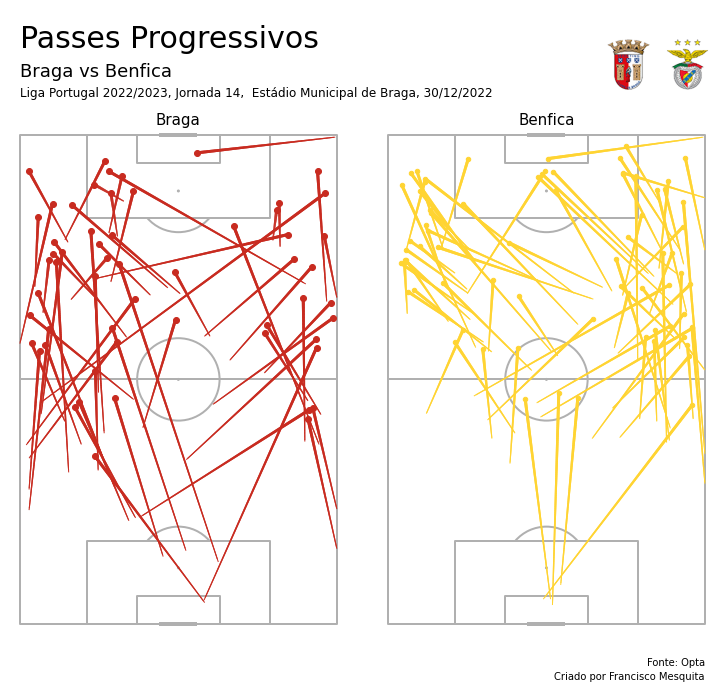

In [22]:
pitch = VerticalPitch(pitch_type = 'opta', line_zorder = 0)
fig, ax = pitch.grid(ncols = 2, axis = False, figheight = 10)
fig.set_facecolor("white")

home = pass_prog[pass_prog.team_name == data['home']['name']]
home_succ = home[home.outcomeType_displayName == 'Successful']
home_succ_Total = home_succ[home_succ.columns[0]].count()
print(data['home']['name'] + ' had ' + str(home_succ_Total) + ' Successfull Progressive Passes')

pitch.lines(home_succ.x, home_succ.y, home_succ.endX, home_succ.endY, 
            comet = True, linewidth = 3, ax = ax['pitch'][0], color = cHome)
pitch.scatter(home_succ.endX, home_succ.endY, ax = ax['pitch'][0], color = cHome)
ax['pitch'][0].text(50, 103, data['home']['name'], va = 'center', ha = 'center', fontsize = 15, color = 'black')

away = pass_prog[pass_prog.team_name == data['away']['name']]
away_succ = away[away.outcomeType_displayName == 'Successful']
away_succ_Total = away_succ[away_succ.columns[0]].count()
print(data['away']['name'] + ' had ' + str(away_succ_Total) + ' Successfull Progressive Passes')

pitch.lines(away_succ.x, away_succ.y, away_succ.endX, away_succ.endY, 
            comet = True, linewidth = 3, ax = ax['pitch'][1], color = cAway)
pitch.scatter(away_succ.endX, away_succ.endY, s = 20, ax = ax['pitch'][1], color = cAway)
ax['pitch'][1].text(50, 103, data['away']['name'], va = 'center', ha = 'center', fontsize = 15, color = 'black')

ax['title'].text(0, 0.7, 'Passes Progressivos', va = 'center', ha = 'left', fontsize = 30, color = 'black')
ax['title'].text(0, 0.4, data['home']['name'] + ' vs ' + data['away']['name'], 
                 va = 'center', ha = 'left', fontsize = 18, color = 'black')
ax['title'].text(0, 0.2, comp + ', ' + stage + ', ' + venue + ', ' + date, 
                 va = 'center', ha = 'left', fontsize = 12, color = 'black')

add_image(Image.open(pHome), fig, 
          left = 0.82, bottom = 0.86, width = 0.07, height = 0.07)
add_image(Image.open(pAway), fig, 
          left = 0.9, bottom = 0.86, width = 0.07, height = 0.07)

ax['endnote'].text(1, 0.6, 'Fonte: Opta', va = 'center', ha = 'right', color = 'black')
ax['endnote'].text(1, 0.3, 'Criado por Francisco Mesquita', va = 'center', ha = 'right', color = 'black')

plt.show()

# Passes para o Último Terço

Braga had 52 Passes to the Attacking 3rd
Benfica had 73 Passes to the Attacking 3rd


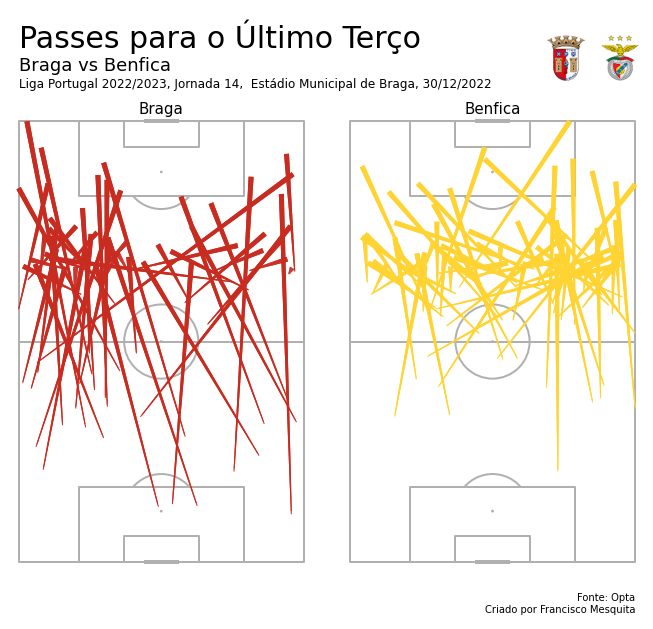

In [89]:
pitch = VerticalPitch(pitch_type = 'opta', half = False)
fig, ax = pitch.grid(ncols = 2, axis = False)
fig.set_facecolor("white")

pass_atk = pass_data[pass_data.to_atk_third == True]

home = pass_atk[pass_atk.team_name == data['home']['name']]
home_Total = home[home.columns[0]].count()
print(data['home']['name'] + ' had ' + str(home_Total) + ' Passes to the Attacking 3rd')
pitch.lines(home.x, home.y, home.endX, home.endY, comet = True, ax = ax['pitch'][0], color = cHome)
ax['pitch'][0].text(50, 103, data['home']['name'], fontsize = 15, va = 'center', ha = 'center', color = 'black')

away = pass_atk[pass_atk.team_name == data['away']['name']]
away_Total = away[away.columns[0]].count()
print(data['away']['name'] + ' had ' + str(away_Total) + ' Passes to the Attacking 3rd')
pitch.lines(away.x, away.y, away.endX, away.endY, comet = True, ax = ax['pitch'][1], color = cAway)
ax['pitch'][1].text(50, 103, data['away']['name'], fontsize = 15, va = 'center', ha = 'center', color = 'black')

ax['title'].text(0, 0.7, 'Passes para o Último Terço', va = 'center', ha = 'left', fontsize = 30, color = 'black')
ax['title'].text(0, 0.4, data['home']['name'] + ' vs ' + data['away']['name'], 
                 va = 'center', ha = 'left', fontsize = 18, color = 'black')
ax['title'].text(0, 0.2, comp + ', ' + stage + ', ' + venue + ', ' + date, 
                 va = 'center', ha = 'left', fontsize = 12, color = 'black')

add_image(Image.open(pHome), fig, 
          left = 0.82, bottom = 0.86, width = 0.07, height = 0.07)
add_image(Image.open(pAway), fig, 
          left = 0.9, bottom = 0.86, width = 0.07, height = 0.07)

ax['endnote'].text(1, 0.6, 'Fonte: Opta', va = 'center', ha = 'right', color = 'black')
ax['endnote'].text(1, 0.3, 'Criado por Francisco Mesquita', va = 'center', ha = 'right', color = 'black')

plt.show()

# Fluxo de Passes

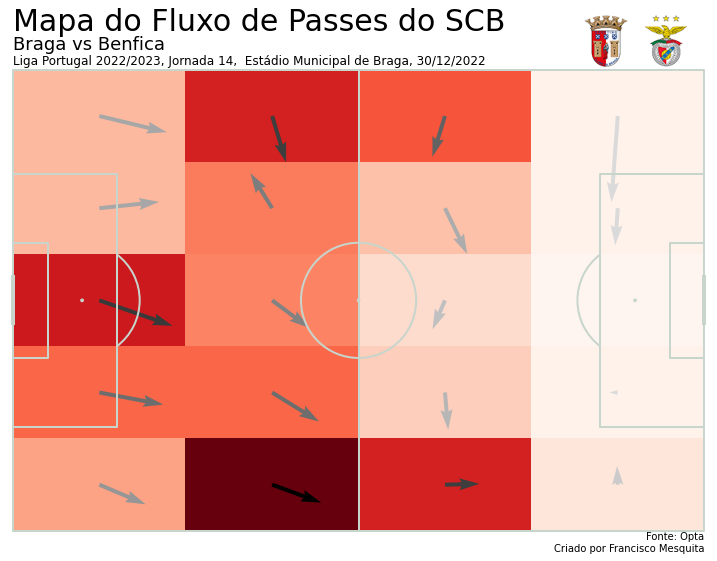

In [23]:
pitch = Pitch(pitch_type = 'statsbomb', pad_bottom = 1, pad_top = 1, pad_left = 1, pad_right = 1,
              line_zorder = 2, line_color = '#c7d5cc', pitch_color = 'white')
fig, axs = pitch.grid(figheight = 8, endnote_height = 0.03, endnote_space = 0,
                      title_height = 0.1, title_space = 0, grid_height = 0.82,
                      axis = False)

home = pass_data[pass_data.team_name == data['home']['name']]
#away = pass_data[pass_data.team_name == data['away']['name']]

bins = (4, 5)

# plot the heatmap - darker colors = more passes originating from that square
bs_heatmap = pitch.bin_statistic(home.x, home.y, statistic = 'count', bins = bins)
hm = pitch.heatmap(bs_heatmap, ax = axs['pitch'], cmap = 'Reds')
grey = LinearSegmentedColormap.from_list('custom cmap', ['#DADADA', 'black'])
fm = pitch.flow(home.x, home.y, home.endX, home.endY,
                cmap = grey, arrow_type = 'scale', arrow_length = 15, bins = bins, ax = axs['pitch'])

axs['title'].text(.0, 0.74, 'Mapa do Fluxo de Passes do SCB', va = 'center', ha = 'left', fontsize = 30, color = 'black')
axs['title'].text(0, 0.35, data['home']['name'] + ' vs ' + data['away']['name'], 
                  va = 'center', ha = 'left', fontsize = 18, color = 'black')
axs['title'].text(0, 0.05, comp + ', ' + stage + ', ' + venue + ', ' + date, 
                  va = 'center', ha ='left', fontsize = 12, color = 'black')

add_image(Image.open(pHome), fig, left = 0.8, bottom = 0.87, width = 0.07, height = 0.09)
add_image(Image.open(pAway), fig, left = 0.88, bottom = 0.87, width = 0.07, height = 0.09)

axs['endnote'].text(1, 1.0, 'Fonte: Opta', va = 'center', ha = 'right', color = 'black')
axs['endnote'].text(1, 0.3, 'Criado por Francisco Mesquita', va = 'center', ha = 'right', color = 'black')

plt.show()

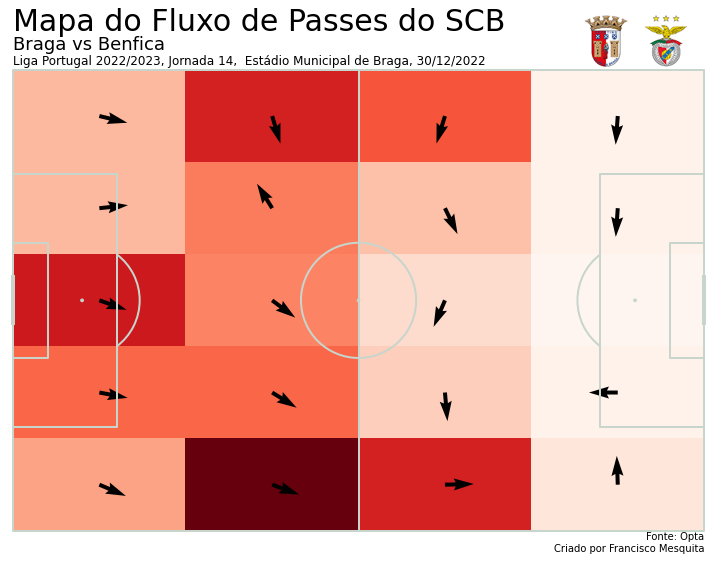

In [24]:
pitch = Pitch(pitch_type = 'statsbomb', pad_bottom = 1, pad_top = 1, pad_left = 1, pad_right = 1,
              line_zorder = 2, line_color = '#c7d5cc', pitch_color = 'white')
fig, axs = pitch.grid(figheight = 8, endnote_height = 0.03, endnote_space = 0,
                      title_height = 0.1, title_space = 0, grid_height = 0.82,
                      axis = False)

home = pass_data[pass_data.team_name == data['home']['name']]
#away = pass_data[pass_data.team_name == data['away']['name']]

bins = (4, 5)

# plot the heatmap - darker colors = more passes originating from that square
bs_heatmap = pitch.bin_statistic(home.x, home.y, statistic = 'count', bins = bins)
hm = pitch.heatmap(bs_heatmap, ax = axs['pitch'], cmap = 'Reds')
fm = pitch.flow(home.x, home.y, home.endX, home.endY,
                color = 'black', arrow_type = 'same', arrow_length = 5, bins = bins, ax = axs['pitch'])

axs['title'].text(.0, 0.74, 'Mapa do Fluxo de Passes do SCB', va = 'center', ha = 'left', fontsize = 30, color = 'black')
axs['title'].text(0, 0.35, data['home']['name'] + ' vs ' + data['away']['name'], 
                  va = 'center', ha = 'left', fontsize = 18, color = 'black')
axs['title'].text(0, 0.05, comp + ', ' + stage + ', ' + venue + ', ' + date, 
                  va = 'center', ha ='left', fontsize = 12, color = 'black')

add_image(Image.open(pHome), fig, left = 0.8, bottom = 0.87, width = 0.07, height = 0.09)
add_image(Image.open(pAway), fig, left = 0.88, bottom = 0.87, width = 0.07, height = 0.09)

axs['endnote'].text(1, 1.0, 'Fonte: Opta', va = 'center', ha = 'right', color = 'black')
axs['endnote'].text(1, 0.3, 'Criado por Francisco Mesquita', va = 'center', ha = 'right', color = 'black')

plt.show()

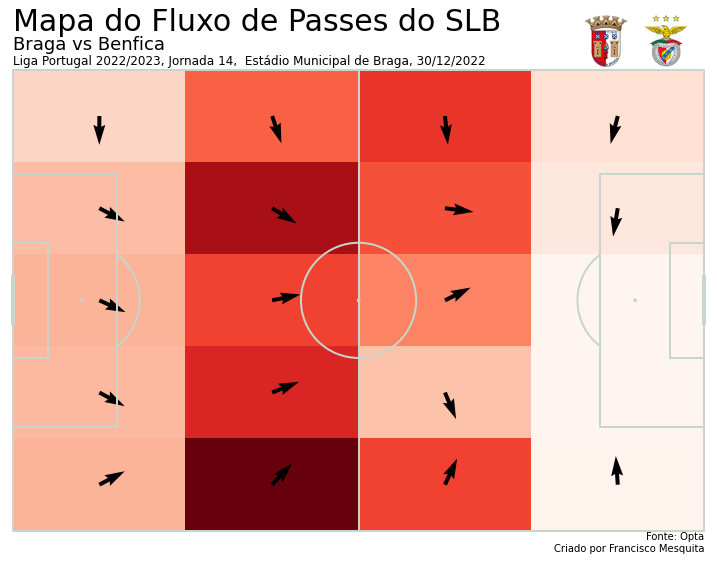

In [25]:
pitch = Pitch(pitch_type = 'statsbomb', pad_bottom = 1, pad_top = 1, pad_left = 1, pad_right = 1,
              line_zorder = 2, line_color = '#c7d5cc', pitch_color = 'white')
fig, axs = pitch.grid(figheight = 8, endnote_height = 0.03, endnote_space = 0,
                      title_height = 0.1, title_space = 0, grid_height = 0.82,
                      axis = False)

#home = pass_data[pass_data.team_name == data['home']['name']]
away = pass_data[pass_data.team_name == data['away']['name']]

bins = (4, 5)

# plot the heatmap - darker colors = more passes originating from that square
bs_heatmap = pitch.bin_statistic(away.x, away.y, statistic = 'count', bins = bins)
hm = pitch.heatmap(bs_heatmap, ax = axs['pitch'], cmap = 'Reds')
fm = pitch.flow(away.x, away.y, away.endX, away.endY,
                color = 'black', arrow_type = 'same', arrow_length = 5, bins = bins, ax = axs['pitch'])

axs['title'].text(.0, 0.74, 'Mapa do Fluxo de Passes do SLB', va = 'center', ha = 'left', fontsize = 30, color = 'black')
axs['title'].text(0, 0.35, data['home']['name'] + ' vs ' + data['away']['name'], 
                  va = 'center', ha = 'left', fontsize = 18, color = 'black')
axs['title'].text(0, 0.05, comp + ', ' + stage + ', ' + venue + ', ' + date, 
                  va = 'center', ha ='left', fontsize = 12, color = 'black')

add_image(Image.open(pHome), fig, left = 0.8, bottom = 0.87, width = 0.07, height = 0.09)
add_image(Image.open(pAway), fig, left = 0.88, bottom = 0.87, width = 0.07, height = 0.09)

axs['endnote'].text(1, 1.0, 'Fonte: Opta', va = 'center', ha = 'right', color = 'black')
axs['endnote'].text(1, 0.3, 'Criado por Francisco Mesquita', va = 'center', ha = 'right', color = 'black')

plt.show()

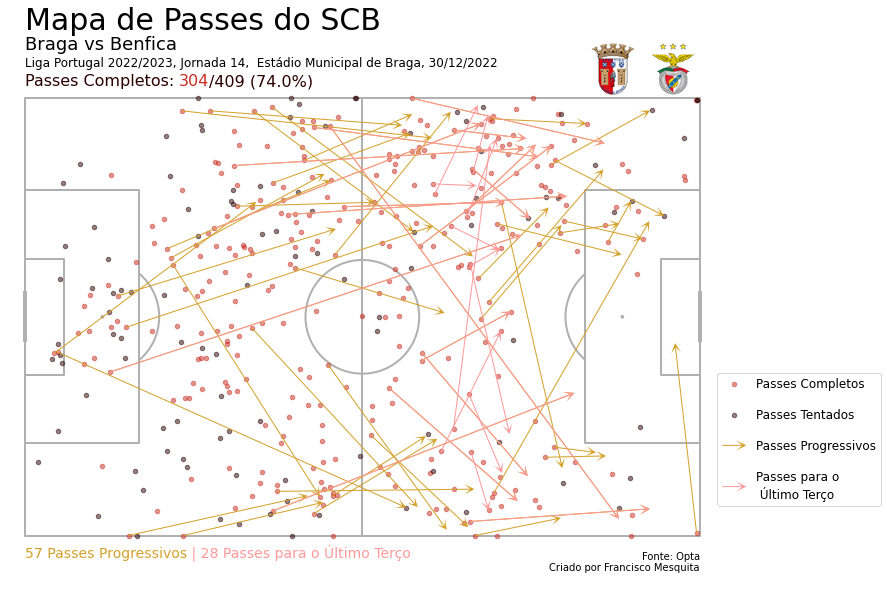

In [26]:
pitch = Pitch(pitch_type = 'opta')
fig, ax = pitch.grid(figheight = 8, title_height = 0.08, endnote_space = 0, axis = False, 
                      title_space = 0, grid_height = 0.82, endnote_height = 0.05)
fig.set_facecolor("white")

home = pass_data[pass_data.team_name == data['home']['name']]
#away = pass_data[pass_data.team_name == data['away']['name']]
pass_succ = home[home.outcomeType_displayName == 'Successful']
pass_fail = home[home.outcomeType_displayName == 'Unsuccessful']

pass_succ_total = pass_succ[pass_succ.columns[0]].count() #number of successful passes
pass_fail_total = pass_fail[pass_fail.columns[0]].count() #number of unsuccessful passes
pass_total = pass_succ_total + pass_fail_total #number of total passes
pass_total_perc = round(100 * pass_succ_total/pass_total, 0)

prog = pass_prog[pass_prog.team_name == data['home']['name']]
#prog = pass_prog[pass_prog.team_name == data['away']['name']]
prog_succ = prog[prog.outcomeType_displayName == 'Successful']
prog_succ_Total = prog_succ[prog_succ.columns[0]].count()

atk3rd = pass_atk[pass_atk.team_name == data['home']['name']]
#atk3rd = pass_atk[pass_atk.team_name == data['away']['name']]
atk3rd_succ = atk3rd[atk3rd.outcomeType_displayName == 'Successful']
atk3rd_succ_Total = atk3rd_succ[atk3rd_succ.columns[0]].count()

pitch.scatter(pass_succ.x, pass_succ.y, s = 20, ax = ax['pitch'], color = cHome, alpha = 0.5, label = 'Passes Completos')
pitch.scatter(pass_fail.x, pass_fail.y, s = 20, ax = ax['pitch'], color = '#2a0000', alpha = 0.5, label = 'Passes Tentados')
pitch.arrows(prog_succ.x, prog_succ.y, prog_succ.endX, prog_succ.endY, width = 1, headwidth = 10, headlength = 10, 
             color = '#D4A12A', ax = ax['pitch'], label = 'Passes Progressivos')
pitch.arrows(atk3rd_succ.x, atk3rd_succ.y, atk3rd_succ.endX, atk3rd_succ.endY, width = 1, headwidth = 10, headlength = 10, 
             color = '#FF9999', ax = ax['pitch'], label = 'Passes para o \n Último Terço')

# add a legend and title
legend = ax['pitch'].legend(loc = (1.,.1), labelspacing = 1.5, fontsize = 12, labelcolor = 'black')

ax['title'].text(0, 1.3, 'Mapa de Passes do SCB', va = 'center', ha = 'left', fontsize = 30, color = 'black')
ax['title'].text(0, .8, data['home']['name'] + ' vs ' + data['away']['name'], 
                 va = 'center', ha = 'left', fontsize = 18, color = 'black')
ax['title'].text(0, 0.4, comp + ', ' + stage + ', ' + venue + ', ' + date, 
                 va = 'center', ha = 'left', fontsize = 12, color = 'black')
ax['title'].text(0, 0.0, 'Passes Completos: ', va = 'center', ha = 'left', fontsize = 16, color = '#2a0000')
ax['title'].text(0.228, 0.0, str(pass_succ_total), va = 'center', ha = 'left', fontsize = 16, color = cHome)
ax['title'].text(0.273, 0.0, '/' + str(pass_total) + ' (' + str(pass_total_perc) + '%)', 
                 va = 'center', ha = 'left', fontsize = 16, color = '#2a0000')
#ax['title'].text(0, 0.0, 'Successful Passes: ' + str(pass_succ_total) + '/' + str(pass_total) + ' (' 
#                 + str(pass_total_perc) + '%), va = 'center', ha = 'left', fontsize = 16, color = 'pink')
ax['endnote'].text(0., 1., str(prog_succ_Total) + ' Passes Progressivos', 
                 va = 'center', ha = 'left', fontsize = 14, color = '#D4A12A')
ax['endnote'].text(0.24, 1., ' | ' + str(atk3rd_succ_Total) + ' Passes para o Último Terço', 
                 va = 'center', ha = 'left', fontsize = 14, color = '#FF9999')
#ax['endnote'].text(0, 1., str(prog_succ_Total) + ' Progressive Passes' + ' | ' + str(atk3rd_succ_Total) 
#                   + ' Passes to the Attacking 3rd', va = 'center', ha = 'left', fontsize = 14, color = 'pink')

add_image(Image.open(pHome), fig, 
          left = 0.8, bottom = 0.87, width = 0.07, height = 0.09)
add_image(Image.open(pAway), fig, 
          left = 0.88, bottom = 0.87, width = 0.07, height = 0.09)

ax['endnote'].text(1, 0.9, 'Fonte: Opta', va = 'center', ha = 'right', color = 'black')
ax['endnote'].text(1, 0.5, 'Criado por Francisco Mesquita', va = 'center', ha = 'right', color = 'black')

plt.show()

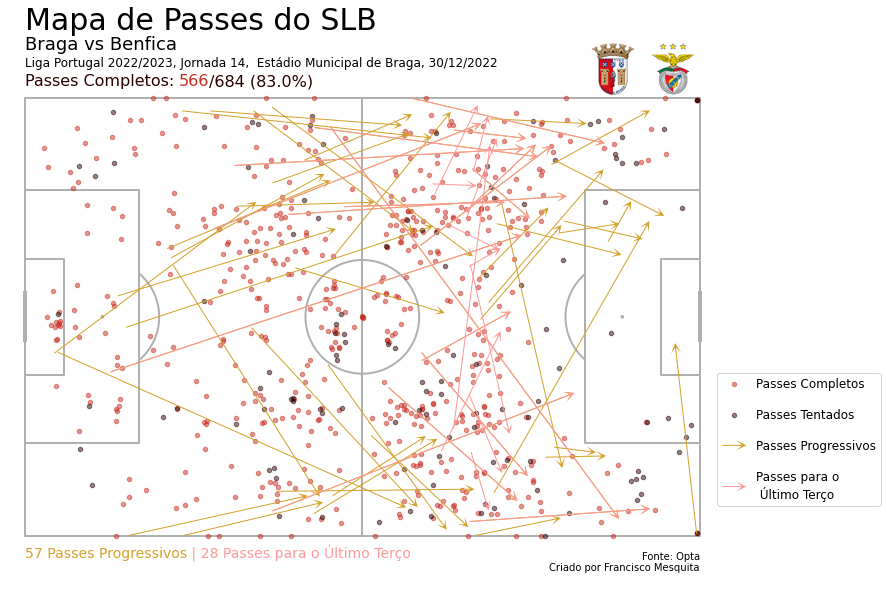

In [27]:
pitch = Pitch(pitch_type = 'opta')
fig, ax = pitch.grid(figheight = 8, title_height = 0.08, endnote_space = 0, axis = False, 
                      title_space = 0, grid_height = 0.82, endnote_height = 0.05)
fig.set_facecolor("white")

#home = pass_data[pass_data.team_name == data['home']['name']]
away = pass_data[pass_data.team_name == data['away']['name']]
pass_succ = away[away.outcomeType_displayName == 'Successful']
pass_fail = away[away.outcomeType_displayName == 'Unsuccessful']

pass_succ_total = pass_succ[pass_succ.columns[0]].count() #number of successful passes
pass_fail_total = pass_fail[pass_fail.columns[0]].count() #number of unsuccessful passes
pass_total = pass_succ_total + pass_fail_total #number of total passes
pass_total_perc = round(100 * pass_succ_total/pass_total, 0)

prog = pass_prog[pass_prog.team_name == data['home']['name']]
#prog = pass_prog[pass_prog.team_name == data['away']['name']]
prog_succ = prog[prog.outcomeType_displayName == 'Successful']
prog_succ_Total = prog_succ[prog_succ.columns[0]].count()

atk3rd = pass_atk[pass_atk.team_name == data['home']['name']]
#atk3rd = pass_atk[pass_atk.team_name == data['away']['name']]
atk3rd_succ = atk3rd[atk3rd.outcomeType_displayName == 'Successful']
atk3rd_succ_Total = atk3rd_succ[atk3rd_succ.columns[0]].count()

pitch.scatter(pass_succ.x, pass_succ.y, s = 20, ax = ax['pitch'], color = cHome, alpha = 0.5, label = 'Passes Completos')
pitch.scatter(pass_fail.x, pass_fail.y, s = 20, ax = ax['pitch'], color = '#2a0000', alpha = 0.5, label = 'Passes Tentados')
pitch.arrows(prog_succ.x, prog_succ.y, prog_succ.endX, prog_succ.endY, width = 1, headwidth = 10, headlength = 10, 
             color = '#D4A12A', ax = ax['pitch'], label = 'Passes Progressivos')
pitch.arrows(atk3rd_succ.x, atk3rd_succ.y, atk3rd_succ.endX, atk3rd_succ.endY, width = 1, headwidth = 10, headlength = 10, 
             color = '#FF9999', ax = ax['pitch'], label = 'Passes para o \n Último Terço')

# add a legend and title
legend = ax['pitch'].legend(loc = (1.,.1), labelspacing = 1.5, fontsize = 12, labelcolor = 'black')

ax['title'].text(0, 1.3, 'Mapa de Passes do SLB', va = 'center', ha = 'left', fontsize = 30, color = 'black')
ax['title'].text(0, .8, data['home']['name'] + ' vs ' + data['away']['name'], 
                 va = 'center', ha = 'left', fontsize = 18, color = 'black')
ax['title'].text(0, 0.4, comp + ', ' + stage + ', ' + venue + ', ' + date, 
                 va = 'center', ha = 'left', fontsize = 12, color = 'black')
ax['title'].text(0, 0.0, 'Passes Completos: ', va = 'center', ha = 'left', fontsize = 16, color = '#2a0000')
ax['title'].text(0.228, 0.0, str(pass_succ_total), va = 'center', ha = 'left', fontsize = 16, color = cHome)
ax['title'].text(0.273, 0.0, '/' + str(pass_total) + ' (' + str(pass_total_perc) + '%)', 
                 va = 'center', ha = 'left', fontsize = 16, color = '#2a0000')
#ax['title'].text(0, 0.0, 'Successful Passes: ' + str(pass_succ_total) + '/' + str(pass_total) + ' (' 
#                 + str(pass_total_perc) + '%), va = 'center', ha = 'left', fontsize = 16, color = 'pink')
ax['endnote'].text(0., 1., str(prog_succ_Total) + ' Passes Progressivos', 
                 va = 'center', ha = 'left', fontsize = 14, color = '#D4A12A')
ax['endnote'].text(0.24, 1., ' | ' + str(atk3rd_succ_Total) + ' Passes para o Último Terço', 
                 va = 'center', ha = 'left', fontsize = 14, color = '#FF9999')
#ax['endnote'].text(0, 1., str(prog_succ_Total) + ' Progressive Passes' + ' | ' + str(atk3rd_succ_Total) 
#                   + ' Passes to the Attacking 3rd', va = 'center', ha = 'left', fontsize = 14, color = 'pink')

add_image(Image.open(pHome), fig, 
          left = 0.8, bottom = 0.87, width = 0.07, height = 0.09)
add_image(Image.open(pAway), fig, 
          left = 0.88, bottom = 0.87, width = 0.07, height = 0.09)

ax['endnote'].text(1, 0.9, 'Fonte: Opta', va = 'center', ha = 'right', color = 'black')
ax['endnote'].text(1, 0.5, 'Criado por Francisco Mesquita', va = 'center', ha = 'right', color = 'black')

plt.show()

# Ações defensivas

In [28]:
df_def = df[df.type_displayName.isin(['Clearance', 'Interception', 'BlockedPass', 'Tackle', 'BallRecovery', 'Aerial'])]
df_def['team_name'] = df_def.teamId.apply(lambda x: team_dict[x])
df_def['player_name'] = df_def.playerId.apply(lambda x: player_dict[x])

In [29]:
Clearance = df[df.type_displayName == 'Clearance'].reset_index()
Clearance['team_name'] = Clearance.teamId.apply(lambda x: team_dict[x])
Clearance['player_name'] = Clearance.playerId.apply(lambda x: player_dict[x])
Clearance = Clearance[Clearance.outcomeType_displayName == 'Successful']
Clearance = Clearance[Clearance.team_name == 'Braga']
Clear_Total = Clearance[Clearance.columns[0]].count()
print(str(Clear_Total) + ' Clearances')

Interception = df[df.type_displayName == 'Interception'].reset_index()
Interception['team_name'] = Interception.teamId.apply(lambda x: team_dict[x])
Interception['player_name'] = Interception.playerId.apply(lambda x: player_dict[x])
Interception = Interception[Interception.outcomeType_displayName == 'Successful']
Interception = Interception[Interception.team_name == 'Braga']
Intercep_Total = Interception[Interception.columns[0]].count()
print(str(Intercep_Total) + ' Interceptions')

BlockedPass = df[df.type_displayName == 'BlockedPass'].reset_index()
BlockedPass['team_name'] = BlockedPass.teamId.apply(lambda x: team_dict[x])
BlockedPass['player_name'] = BlockedPass.playerId.apply(lambda x: player_dict[x])
BlockedPass = BlockedPass[BlockedPass.outcomeType_displayName == 'Successful']
BlockedPass = BlockedPass[BlockedPass.team_name == 'Braga']
BlockPass_Total = BlockedPass[BlockedPass.columns[0]].count()
print(str(BlockPass_Total) + ' Blocked Passes')

Tackle = df[df.type_displayName == 'Tackle'].reset_index()
Tackle['team_name'] = Tackle.teamId.apply(lambda x: team_dict[x])
Tackle['player_name'] = Tackle.playerId.apply(lambda x: player_dict[x])
Tackle = Tackle[Tackle.outcomeType_displayName == 'Successful']
Tackle = Tackle[Tackle.team_name == 'Braga']
Tackle_Total = Tackle[Tackle.columns[0]].count()
print(str(Tackle_Total) + ' Tackles')

BallRecovery = df[df.type_displayName == 'BallRecovery'].reset_index()
BallRecovery['team_name'] = BallRecovery.teamId.apply(lambda x: team_dict[x])
BallRecovery['player_name'] = BallRecovery.playerId.apply(lambda x: player_dict[x])
BallRecovery = BallRecovery[BallRecovery.outcomeType_displayName == 'Successful']
BallRecovery = BallRecovery[BallRecovery.team_name == 'braga']
BallRecover_Total = BallRecovery[BallRecovery.columns[0]].count()
print(str(BallRecover_Total) + ' Ball Recoveries')

Aerial = df[df.type_displayName == 'Aerial'].reset_index()
AerialWon = Aerial[Aerial.outcomeType_displayName == 'Successful']
AerialWon['team_name'] = AerialWon.teamId.apply(lambda x: team_dict[x])
AerialWon['player_name'] = AerialWon.playerId.apply(lambda x: player_dict[x])
AerialWon = AerialWon[AerialWon.outcomeType_displayName == 'Successful']
AerialWon = AerialWon[AerialWon.team_name == 'Braga']
AerialWon_Total = AerialWon[AerialWon.columns[0]].count()
print(str(AerialWon_Total) + ' Aerial Duels Won')

20 Clearances
13 Interceptions
10 Blocked Passes
8 Tackles
0 Ball Recoveries
10 Aerial Duels Won


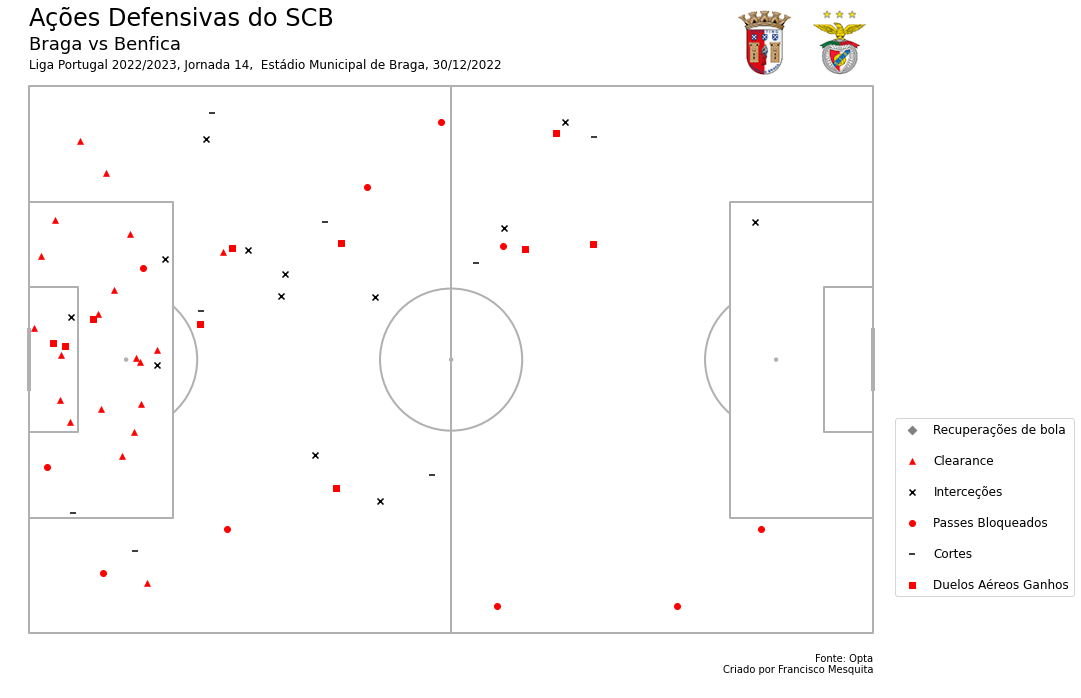

In [30]:
pitch = Pitch(pitch_type = 'opta')
fig, axs = pitch.grid(figheight = 10, title_height = 0.08, endnote_space = 0, axis = False, 
                      title_space = 0, grid_height = 0.82, endnote_height = 0.05)
fig.set_facecolor("white")

pitch.scatter(BallRecovery.x, BallRecovery.y, c = 'grey', edgecolors = 'grey',
              marker = 'D', ax = axs['pitch'], zorder = 2, label = 'Recuperações de bola')

pitch.scatter(Clearance.x, Clearance.y, edgecolors = 'red', linewidth = 0.6, c = 'red', 
             marker = '^', ax = axs['pitch'], zorder = 2, label = 'Clearance')

pitch.scatter(Interception.x, Interception.y, c = 'black', edgecolors = 'black',
              marker = 'x', ax = axs['pitch'], zorder = 2, label = 'Interceções')

pitch.scatter(BlockedPass.x, BlockedPass.y, c = 'red', edgecolors = 'red',
              marker = 'o', ax = axs['pitch'], zorder = 2, label = 'Passes Bloqueados')

pitch.scatter(Tackle.x, Tackle.y, c = 'black', edgecolors = 'black',
              marker = '_', ax = axs['pitch'], zorder = 2, label = 'Cortes')

pitch.scatter(AerialWon.x, AerialWon.y, c = 'red', edgecolors = 'red',
              marker = 's', ax = axs['pitch'], zorder = 2, label = 'Duelos Aéreos Ganhos')

axs['title'].text(0, 0.8, 'Ações Defensivas do SCB', va = 'center', ha = 'left', fontsize = 24, color = 'black')
axs['title'].text(0, 0.35, data['home']['name'] + ' vs ' + data['away']['name'], 
                  va = 'center', ha = 'left', fontsize = 18, color = 'black')
axs['title'].text(0, 0., comp + ', ' + stage + ', ' + venue + ', ' + date, 
                  va = 'center', ha = 'left', fontsize = 12, color = 'black')

# add a legend and title
legend = axs['pitch'].legend(loc = (1.,.1), labelspacing = 1.5, fontsize = 12, labelcolor = 'black')

add_image(Image.open(pHome), fig, 
          left = 0.8, bottom = 0.88, width = 0.07, height = 0.09)
add_image(Image.open(pAway), fig, 
          left = 0.88, bottom = 0.88, width = 0.07, height = 0.09)

axs['endnote'].text(1, 0.9, 'Fonte: Opta', va = 'center', ha = 'right', color = 'black')
axs['endnote'].text(1, 0.6, 'Criado por Francisco Mesquita', va = 'center', ha = 'right', color = 'black')

plt.show()

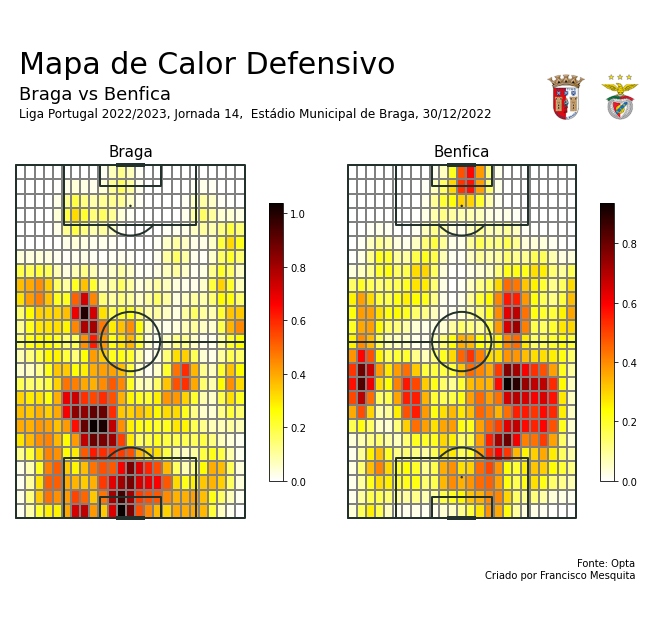

In [31]:
pitch = VerticalPitch(pitch_type= 'opta', line_color = '#22312b')
fig, ax = pitch.grid(ncols = 2, axis = False,)
fig.set_facecolor("white")

# Home Team
home = df_def[df_def.team_name == data['home']['name']]
bin_statistic = pitch.bin_statistic(home.x, home.y, statistic= 'count', bins = (25, 25))
bin_statistic['statistic'] = gaussian_filter(bin_statistic['statistic'], 1)

hm = pitch.heatmap(bin_statistic, ax = ax['pitch'][0], cmap = 'hot_r', edgecolors = 'gray', zorder = 0)
cbar = fig.colorbar(hm, ax = ax['pitch'][0], shrink = 0.6)
ax['pitch'][0].text(50, 104, data['home']['name'], va = 'center', ha = 'center', fontsize = 15, color = 'black')

# Away Team
away = df_def[df_def.team_name == data['away']['name']]
bin_statistic = pitch.bin_statistic(away.x, away.y, statistic = 'count', bins = (25, 25))
bin_statistic['statistic'] = gaussian_filter(bin_statistic['statistic'], 1)

am = pitch.heatmap(bin_statistic, ax = ax['pitch'][1], cmap = 'hot_r', edgecolors = 'gray', zorder = 0)
cbar = fig.colorbar(am, ax = ax['pitch'][1], shrink = 0.6)
ax['pitch'][1].text(50, 104, data['away']['name'], va = 'center', ha = 'center', fontsize = 15, color = 'black')

ax['title'].text(0, 0.4, 'Mapa de Calor Defensivo', va = 'center', ha = 'left', fontsize = 30, color = 'black')
ax['title'].text(0, 0.1, data['home']['name'] + ' vs ' + data['away']['name'], 
                 va = 'center', ha = 'left', fontsize = 18, color = 'black')
ax['title'].text(0, -0.1, comp + ', ' + stage + ', ' + venue + ', ' + date, 
                 va = 'center', ha = 'left', fontsize = 12, color = 'black')

# Home
add_image(Image.open(pHome), fig, 
          left = 0.82, bottom = 0.8, width = 0.07, height = 0.07)
# Away
add_image(Image.open(pAway), fig, 
          left = 0.9, bottom = 0.8, width = 0.07, height = 0.07)

ax['endnote'].text(1, 1.4, 'Fonte: Opta', va = 'center', ha = 'right', color = 'black')
ax['endnote'].text(1, 1.1, 'Criado por Francisco Mesquita', va = 'center', ha = 'right', color = 'black')

plt.show()

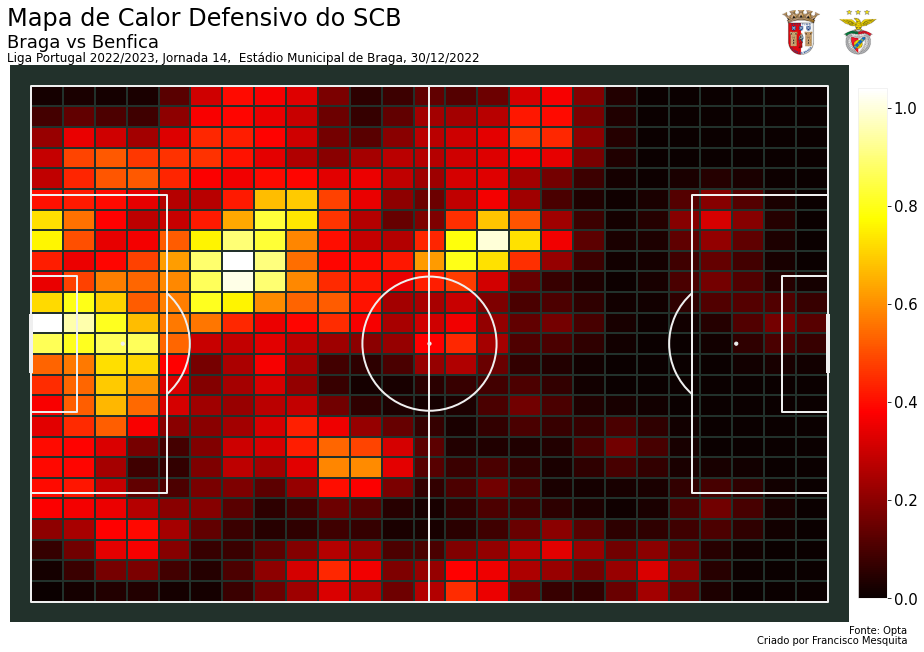

In [32]:
pitch = Pitch(pitch_type = 'opta', line_zorder = 2, pitch_color = '#22312b', line_color = '#efefef')
fig, axs = pitch.grid(endnote_height = 0.03, endnote_space = 0, grid_width = 0.88, left = 0.025,
                      title_height = 0.06, title_space = 0, axis = False, grid_height = 0.86)
fig.set_facecolor('white')

home = df_def[df_def.team_name == data['home']['name']]
#away = df_def[df_def.team_name == data['away']['name']]

# plot heatmap
bin_statistic = pitch.bin_statistic(home.x, home.y, statistic = 'count', bins = (25, 25))
bin_statistic['statistic'] = gaussian_filter(bin_statistic['statistic'], 1)
pcm = pitch.heatmap(bin_statistic, ax = axs['pitch'], cmap = 'hot', edgecolors = '#22312b')

# add cbar
ax_cbar = fig.add_axes((0.915, 0.093, 0.03, 0.786))
cbar = plt.colorbar(pcm, cax = ax_cbar)
cbar.outline.set_edgecolor('#efefef')
cbar.ax.yaxis.set_tick_params(color = 'black')
plt.setp(plt.getp(cbar.ax.axes, 'yticklabels'), color = 'black')
for label in cbar.ax.get_yticklabels():
    label.set_fontsize(15)

axs['title'].text(-0.03, 1.2, 'Mapa de Calor Defensivo do SCB', 
#axs['title'].text(-0.03, 1.2, 'Defensive Heat Map by ' + data['away']['name'], 
                  va = 'center', ha = 'left', fontsize = 24, color = 'black')
axs['title'].text(-0.03, 0.6, data['home']['name'] + ' vs ' + data['away']['name'], 
                  va = 'center', ha = 'left', fontsize = 18, color = 'black')
axs['title'].text(-0.03, 0.2, comp + ', ' + stage + ', ' + venue + ', ' + date, 
                  va = 'center', ha = 'left', fontsize = 12, color = 'black')    
    
# Home
add_image(Image.open(pHome), fig, 
          left = 0.82, bottom = 0.93, width = 0.07, height = 0.07)
# Away
add_image(Image.open(pAway), fig, 
          left = 0.88, bottom = 0.93, width = 0.07, height = 0.07)

axs['endnote'].text(1.1, .6, 'Fonte: Opta', va = 'center', ha = 'right', color = 'black')
axs['endnote'].text(1.1, .1, 'Criado por Francisco Mesquita', va = 'center', ha = 'right', color = 'black')

plt.show()

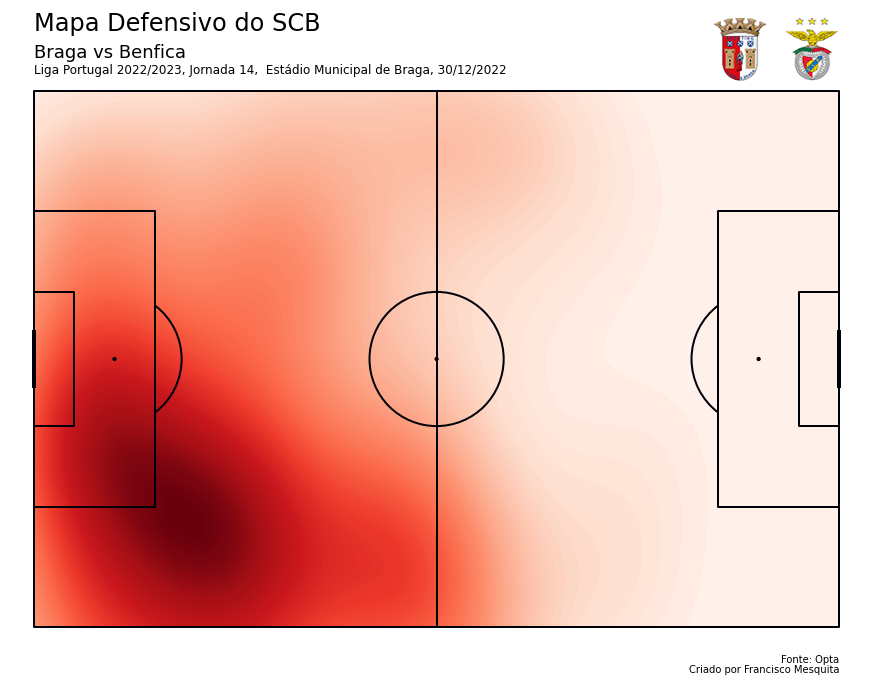

In [93]:
fig, axs = pitch.grid(figheight = 10, title_height = 0.08, endnote_space = 0, title_space = 0,
                      axis = False, grid_height = 0.82, endnote_height = 0.03)
fig.set_facecolor('white')

pitch = Pitch(line_color = '#000009', line_zorder = 1)

home = df_def[df_def.team_name == data['home']['name']]
#away = df_def[df_def.team_name == data['away']['name']]

kde_HD = pitch.kdeplot(home.x, home.y, ax = axs['pitch'], shade = True, levels = 100, 
                       shade_lowest = True, cut = 4, cmap = 'Reds')

axs['title'].text(0, 0.7, 'Mapa Defensivo do SCB',  
                  va = 'center', ha = 'left', fontsize = 24, color = 'black')
axs['title'].text(0, 0.2, data['home']['name'] + ' vs ' + data['away']['name'], 
                  va = 'center', ha = 'left', fontsize = 18, color = 'black')
axs['title'].text(0, -0.1, comp + ', ' + stage + ', ' + venue + ', ' + date, 
                  va = 'center', ha = 'left', fontsize = 12, color = 'black')


axs['endnote'].text(1, 0.8, 'Fonte: Opta', va = 'center', ha = 'right', color = 'black')
axs['endnote'].text(1, 0.3, 'Criado por Francisco Mesquita', va = 'center', ha = 'right', color = 'black')

add_image(Image.open(pHome), fig, 
          left = 0.8, bottom = 0.86, width = 0.07, height = 0.09)
add_image(Image.open(pAway), fig, 
          left = 0.88, bottom = 0.86, width = 0.07, height = 0.09)

plt.show()

# Remates

In [33]:
MissedShots1 = df[df.type_displayName == 'MissedShots'].reset_index()
MissedShots1['team_name'] = MissedShots1.teamId.apply(lambda x: team_dict[x])
MissedShots1['player_name'] = MissedShots1.playerId.apply(lambda x: player_dict[x])
MissedShots1 = MissedShots1[MissedShots1.team_name == 'Braga']
MissedShots_Total1 = MissedShots1[MissedShots1.columns[0]].count()
print(str(MissedShots_Total1) + ' Missed Shots (Off Target)')

ShotOnPost1 = df[df.type_displayName == 'ShotOnPost'].reset_index()
ShotOnPost1['team_name'] = ShotOnPost1.teamId.apply(lambda x: team_dict[x])
ShotOnPost1['player_name'] = ShotOnPost1.playerId.apply(lambda x: player_dict[x])
ShotOnPost1 = ShotOnPost1[ShotOnPost1.team_name == 'Braga']
ShotOnPost_Total1 = ShotOnPost1[ShotOnPost1.columns[0]].count()
print(str(ShotOnPost_Total1) + ' Shots on Post')

SavedShot1 = df[df.type_displayName == 'SavedShot'].reset_index()
SavedShot1['team_name'] = SavedShot1.teamId.apply(lambda x: team_dict[x])
SavedShot1['player_name'] = SavedShot1.playerId.apply(lambda x: player_dict[x])
SavedShot1 = SavedShot1[SavedShot1.team_name == 'Braga']
SavedShot_Total1 = SavedShot1[SavedShot1.columns[0]].count()
print(str(SavedShot_Total1) + ' Saved Shots')

Goal1 = df[df.type_displayName == 'Goal'].reset_index()
Goal1['team_name'] = Goal1.teamId.apply(lambda x: team_dict[x])
Goal1['player_name'] = Goal1.playerId.apply(lambda x: player_dict[x])
#OwnGoal = Goal[Goal.team_name == Opp]
#OwnGoal_Total = OwnGoal[OwnGoal.columns[0]].count()
Goal1 = Goal1[Goal1.team_name == 'Braga']
Goal_Total1 = Goal1[Goal1.columns[0]].count()
print(str(Goal_Total1) + ' Goals')
#print(str(OwnGoal_Total) + ' Own Goal')

Shot1 = df[df.type_displayName.isin(['MissedShots', 'ShotOnPost', 'SavedShot', 'Goal'])]
Shot1['team_name'] = Shot1.teamId.apply(lambda x: team_dict[x])
Shot1['player_name'] = Shot1.playerId.apply(lambda x: player_dict[x])
Shot1 = Shot1[Shot1.team_name == 'Braga']
Shot_Total1 = Shot1[Shot1.columns[0]].count()
print(str(Shot_Total1) + ' Total Shots')

7 Missed Shots (Off Target)
0 Shots on Post
5 Saved Shots
3 Goals
15 Total Shots


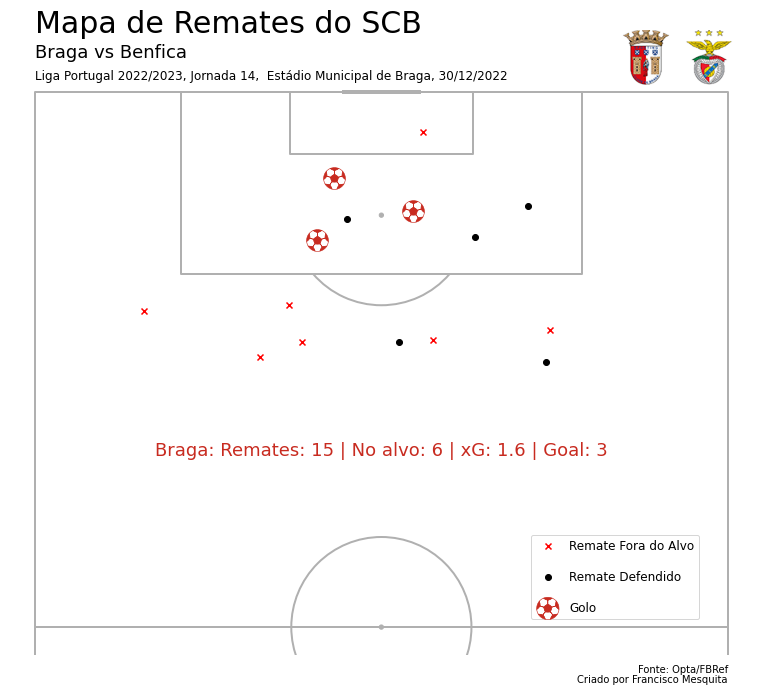

In [34]:
pitch = VerticalPitch(pitch_type = 'opta', half = True)
fig, axs = pitch.grid(figheight = 10, title_height = 0.08, endnote_space = 0, axis = False, 
                      title_space = 0, grid_height = 0.82, endnote_height = 0.05)
fig.set_facecolor("white")

#pitch.scatter(100-OwnGoal.x, OwnGoal.y, edgecolors = 'red', linewidth = 0.6, c = 'white', 
#            marker = 'football', ax = axs['pitch'], zorder = 2, label = 'Own Goal')

pitch.scatter(MissedShots1.x, MissedShots1.y, c = 'red', edgecolors = 'red',
              marker = 'x', ax = axs['pitch'], zorder = 2, label = 'Remate Fora do Alvo')

pitch.scatter(SavedShot1.x, SavedShot1.y, c = 'black', edgecolors = 'black',
              marker = 'o', ax = axs['pitch'], zorder = 2, label = 'Remate Defendido')

#pitch.scatter(ShotOnPost1.x, ShotOnPost1.y, c = 'grey', edgecolors = 'black',
#              marker = 'x', ax = axs['pitch'], zorder = 2, label = 'Shot on Post')

pitch.scatter(Goal1.x, Goal1.y, edgecolors = cHome, linewidth = 0.6, c = 'white', 
#pitch.scatter(Goal.x, Goal.y, edgecolors = cAway, linewidth = 0.6, c = 'white', 
             marker = 'football', ax = axs['pitch'], zorder = 2, label = 'Golo')

axs['title'].text(0, 0.7, 'Mapa de Remates do SCB', va = 'center', ha = 'left', fontsize = 30, color = 'black')
axs['title'].text(0, 0.2, data['home']['name'] + ' vs ' + data['away']['name'], 
                  va = 'center', ha = 'left', fontsize = 18, color = 'black')
axs['title'].text(0, -0.2, comp + ', ' + stage + ', ' + venue + ', ' + date, 
                  va = 'center', ha = 'left', fontsize = 12, color = 'black')

# add a legend and title
legend = axs['pitch'].legend(loc = (0.7,.06), labelspacing = 1.5, fontsize = 12, labelcolor = 'black')

add_image(Image.open(pHome), fig, 
          left = 0.8, bottom = 0.86, width = 0.07, height = 0.09)
add_image(Image.open(pAway), fig, 
          left = 0.88, bottom = 0.86, width = 0.07, height = 0.09)

axs['endnote'].text(1, 0.6, 'Fonte: Opta/FBRef', va = 'center', ha = 'right', color = 'black')
axs['endnote'].text(1, 0.3, 'Criado por Francisco Mesquita', va = 'center', ha = 'right', color = 'black')


axs['title'].text(0.5, -6.7, "Braga: Remates: 15 | No alvo: 6 | xG: 1.6 | Goal: 3", 
                 color = cHome, va = 'center', ha = 'center', fontsize = 18)
#                 color = cAway, va = 'center', ha = 'center', fontsize = 18)

plt.show()

In [35]:
MissedShots2 = df[df.type_displayName == 'MissedShots'].reset_index()
MissedShots2['team_name'] = MissedShots2.teamId.apply(lambda x: team_dict[x])
MissedShots2['player_name'] = MissedShots2.playerId.apply(lambda x: player_dict[x])
MissedShots2 = MissedShots2[MissedShots2.team_name == 'Benfica']
MissedShots_Total2 = MissedShots2[MissedShots2.columns[0]].count()
print(str(MissedShots_Total2) + ' Missed Shots (Off Target)')

ShotOnPost2 = df[df.type_displayName == 'ShotOnPost'].reset_index()
ShotOnPost2['team_name'] = ShotOnPost2.teamId.apply(lambda x: team_dict[x])
ShotOnPost2['player_name'] = ShotOnPost2.playerId.apply(lambda x: player_dict[x])
ShotOnPost2 = ShotOnPost2[ShotOnPost2.team_name == 'Benfica']
ShotOnPost_Total2 = ShotOnPost2[ShotOnPost2.columns[0]].count()
print(str(ShotOnPost_Total2) + ' Shots on Post')

SavedShot2 = df[df.type_displayName == 'SavedShot'].reset_index()
SavedShot2['team_name'] = SavedShot2.teamId.apply(lambda x: team_dict[x])
SavedShot2['player_name'] = SavedShot2.playerId.apply(lambda x: player_dict[x])
SavedShot2 = SavedShot2[SavedShot2.team_name == 'Benfica']
SavedShot_Total2 = SavedShot2[SavedShot2.columns[0]].count()
print(str(SavedShot_Total2) + ' Saved Shots')

Goal2 = df[df.type_displayName == 'Goal'].reset_index()
Goal2['team_name'] = Goal2.teamId.apply(lambda x: team_dict[x])
Goal2['player_name'] = Goal2.playerId.apply(lambda x: player_dict[x])
#OwnGoal = Goal[Goal.team_name == Opp]
#OwnGoal_Total = OwnGoal[OwnGoal.columns[0]].count()
Goal2 = Goal2[Goal2.team_name == 'Benfica']
Goal_Total2 = Goal2[Goal2.columns[0]].count()
print(str(Goal_Total2) + ' Goals')
#print(str(OwnGoal_Total) + ' Own Goal')

Shot2 = df[df.type_displayName.isin(['MissedShots', 'ShotOnPost', 'SavedShot', 'Goal'])]
Shot2['team_name'] = Shot2.teamId.apply(lambda x: team_dict[x])
Shot2['player_name'] = Shot2.playerId.apply(lambda x: player_dict[x])
Shot2 = Shot2[Shot2.team_name == 'Benfica']
Shot_Total2 = Shot2[Shot2.columns[0]].count()
print(str(Shot_Total2) + ' Total Shots')

4 Missed Shots (Off Target)
0 Shots on Post
6 Saved Shots
0 Goals
10 Total Shots


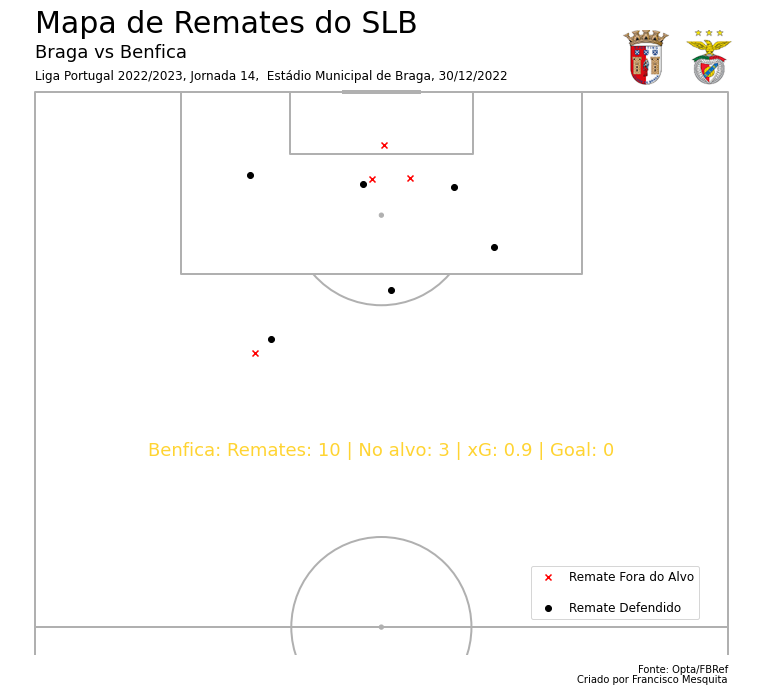

In [94]:
pitch = VerticalPitch(pitch_type = 'opta', half = True)
fig, axs = pitch.grid(figheight = 10, title_height = 0.08, endnote_space = 0, axis = False, 
                      title_space = 0, grid_height = 0.82, endnote_height = 0.05)
fig.set_facecolor("white")

#pitch.scatter(100-OwnGoal.x, OwnGoal.y, edgecolors = 'red', linewidth = 0.6, c = 'white', 
#            marker = 'football', ax = axs['pitch'], zorder = 2, label = 'Own Goal')

pitch.scatter(MissedShots2.x, MissedShots2.y, c = 'red', edgecolors = 'red',
              marker = 'x', ax = axs['pitch'], zorder = 2, label = 'Remate Fora do Alvo')

pitch.scatter(SavedShot2.x, SavedShot2.y, c = 'black', edgecolors = 'black',
              marker = 'o', ax = axs['pitch'], zorder = 2, label = 'Remate Defendido')

#pitch.scatter(ShotOnPost2.x, ShotOnPost2.y, c = 'grey', edgecolors = 'black',
#              marker = 'x', ax = axs['pitch'], zorder = 2, label = 'Shot on Post')

#pitch.scatter(Goal1.x, Goal1.y, edgecolors = cHome, linewidth = 0.6, c = 'white', 
#pitch.scatter(Goal2.x, Goal2.y, edgecolors = cAway, linewidth = 0.6, c = 'white', 
#             marker = 'football', ax = axs['pitch'], zorder = 2, label = 'Goal')

axs['title'].text(0, 0.7, 'Mapa de Remates do SLB', va = 'center', ha = 'left', fontsize = 30, color = 'black')
axs['title'].text(0, 0.2, data['home']['name'] + ' vs ' + data['away']['name'], 
                  va = 'center', ha = 'left', fontsize = 18, color = 'black')
axs['title'].text(0, -0.2, comp + ', ' + stage + ', ' + venue + ', ' + date, 
                  va = 'center', ha = 'left', fontsize = 12, color = 'black')

# add a legend and title
legend = axs['pitch'].legend(loc = (0.7,.06), labelspacing = 1.5, fontsize = 12, labelcolor = 'black')

add_image(Image.open(pHome), fig, 
          left = 0.8, bottom = 0.86, width = 0.07, height = 0.09)
add_image(Image.open(pAway), fig, 
          left = 0.88, bottom = 0.86, width = 0.07, height = 0.09)

axs['endnote'].text(1, 0.6, 'Fonte: Opta/FBRef', va = 'center', ha = 'right', color = 'black')
axs['endnote'].text(1, 0.3, 'Criado por Francisco Mesquita', va = 'center', ha = 'right', color = 'black')


axs['title'].text(0.5, -6.7, "Benfica: Remates: 10 | No alvo: 3 | xG: 0.9 | Goal: 0", 
#                 color = cHome, va = 'center', ha = 'center', fontsize = 18)
                 color = cAway, va = 'center', ha = 'center', fontsize = 18)

plt.show()

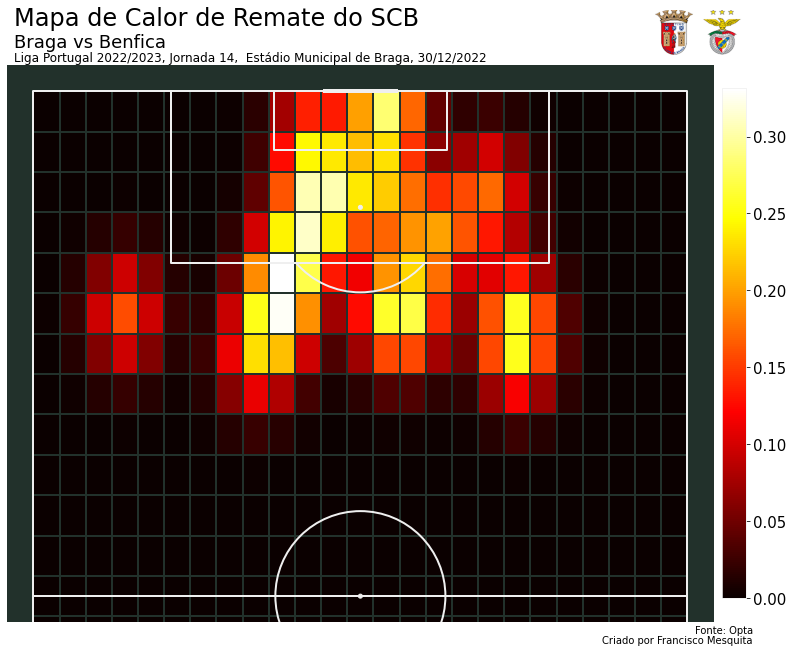

In [43]:
pitch = VerticalPitch(pitch_type = 'opta', line_zorder = 2, pitch_color = '#22312b', line_color = '#efefef', half = True)
fig, axs = pitch.grid(endnote_height = 0.03, endnote_space = 0, grid_width = 0.88, left = 0.025,
                      title_height = 0.06, title_space = 0, axis = False, grid_height = 0.86)
fig.set_facecolor('white')

# plot heatmap
bin_statistic = pitch.bin_statistic(Shot1.x, Shot1.y, statistic = 'count', bins = (25, 25))
bin_statistic['statistic'] = gaussian_filter(bin_statistic['statistic'], 1)
pcm = pitch.heatmap(bin_statistic, ax = axs['pitch'], cmap = 'hot', edgecolors = '#22312b')

# add cbar
ax_cbar = fig.add_axes((0.915, 0.093, 0.03, 0.786))
cbar = plt.colorbar(pcm, cax = ax_cbar)
cbar.outline.set_edgecolor('#efefef')
cbar.ax.yaxis.set_tick_params(color = 'black')
plt.setp(plt.getp(cbar.ax.axes, 'yticklabels'), color = 'black')
for label in cbar.ax.get_yticklabels():
    label.set_fontsize(15)
 
axs['title'].text(-0.03, 1.2, 'Mapa de Calor de Remate do SCB', 
                  va = 'center', ha = 'left', fontsize = 24, color = 'black')
axs['title'].text(-0.03, 0.6, data['home']['name'] + ' vs ' + data['away']['name'], 
                  va = 'center', ha = 'left', fontsize = 18, color = 'black')
axs['title'].text(-0.03, 0.2, comp + ', ' + stage + ', ' + venue + ', ' + date, 
                  va = 'center', ha = 'left', fontsize = 12, color = 'black')    
    
# Home
add_image(Image.open(pHome), fig, 
          left = 0.82, bottom = 0.93, width = 0.07, height = 0.07)
# Away
add_image(Image.open(pAway), fig, 
          left = 0.88, bottom = 0.93, width = 0.07, height = 0.07)

axs['endnote'].text(1.1, .6, 'Fonte: Opta', va = 'center', ha = 'right', color = 'black')
axs['endnote'].text(1.1, .1, 'Criado por Francisco Mesquita', va = 'center', ha = 'right', color = 'black')

plt.show()

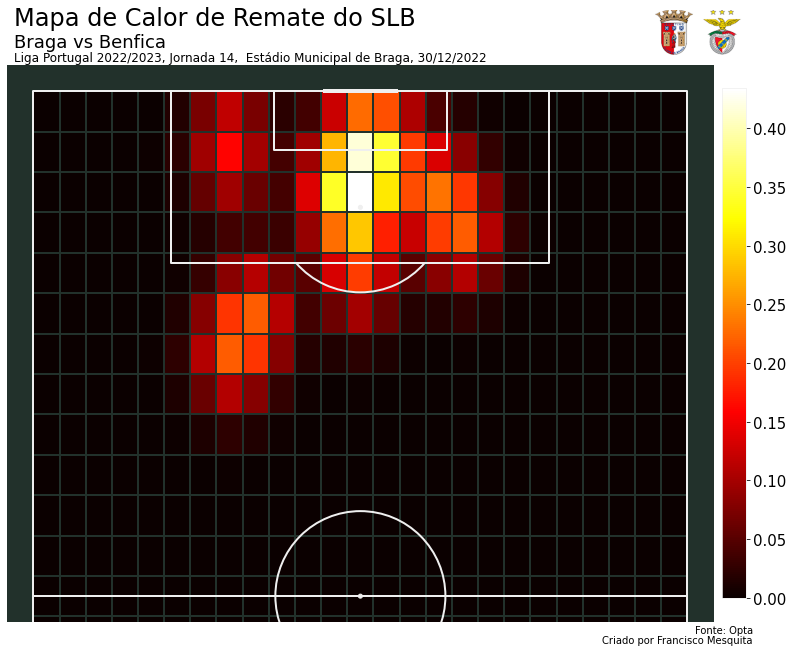

In [42]:
pitch = VerticalPitch(pitch_type = 'opta', line_zorder = 2, pitch_color = '#22312b', line_color = '#efefef', half = True)
fig, axs = pitch.grid(endnote_height = 0.03, endnote_space = 0, grid_width = 0.88, left = 0.025,
                      title_height = 0.06, title_space = 0, axis = False, grid_height = 0.86)
fig.set_facecolor('white')

# plot heatmap
bin_statistic = pitch.bin_statistic(Shot2.x, Shot2.y, statistic = 'count', bins = (25, 25))
bin_statistic['statistic'] = gaussian_filter(bin_statistic['statistic'], 1)
pcm = pitch.heatmap(bin_statistic, ax = axs['pitch'], cmap = 'hot', edgecolors = '#22312b')

# add cbar
ax_cbar = fig.add_axes((0.915, 0.093, 0.03, 0.786))
cbar = plt.colorbar(pcm, cax = ax_cbar)
cbar.outline.set_edgecolor('#efefef')
cbar.ax.yaxis.set_tick_params(color = 'black')
plt.setp(plt.getp(cbar.ax.axes, 'yticklabels'), color = 'black')
for label in cbar.ax.get_yticklabels():
    label.set_fontsize(15)
 
axs['title'].text(-0.03, 1.2, 'Mapa de Calor de Remate do SLB', 
                  va = 'center', ha = 'left', fontsize = 24, color = 'black')
axs['title'].text(-0.03, 0.6, data['home']['name'] + ' vs ' + data['away']['name'], 
                  va = 'center', ha = 'left', fontsize = 18, color = 'black')
axs['title'].text(-0.03, 0.2, comp + ', ' + stage + ', ' + venue + ', ' + date, 
                  va = 'center', ha = 'left', fontsize = 12, color = 'black')    
    
# Home
add_image(Image.open(pHome), fig, 
          left = 0.82, bottom = 0.93, width = 0.07, height = 0.07)
# Away
add_image(Image.open(pAway), fig, 
          left = 0.88, bottom = 0.93, width = 0.07, height = 0.07)

axs['endnote'].text(1.1, .6, 'Fonte: Opta', va = 'center', ha = 'right', color = 'black')
axs['endnote'].text(1.1, .1, 'Criado por Francisco Mesquita', va = 'center', ha = 'right', color = 'black')

plt.show()

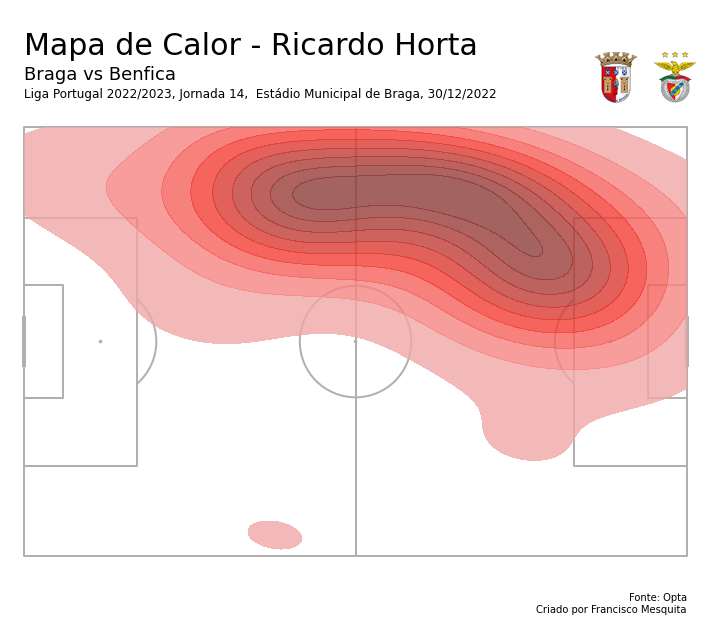

In [53]:
pitch = Pitch(pitch_type = 'opta')
fig, ax = pitch.grid(axis = False)
fig.set_facecolor("white")

player1 = touches_df[touches_df.player_name == 'Ricardo Horta']

pitch.kdeplot(player1.x, player1.y, shade = True, alpha = 0.8, ax = ax['pitch'], color = cHome)

ax['title'].text(0, 0.6, 'Mapa de Calor - Ricardo Horta', va = 'center', ha = 'left', fontsize=30, color = 'black')
ax['title'].text(0, 0.3, data['home']['name'] + ' vs ' + data['away']['name'], 
                 va = 'center', ha = 'left', fontsize = 18, color = 'black')
ax['title'].text(0, 0.1, comp + ', ' + stage + ', ' + venue + ', ' + date, 
                 va = 'center', ha = 'left', fontsize = 12, color = 'black')

add_image(Image.open(pHome), fig, 
          left = 0.82, bottom = 0.82, width = 0.07, height = 0.09)
add_image(Image.open(pAway), fig, 
          left = 0.9, bottom = 0.82, width = 0.07, height = 0.09)

ax['endnote'].text(1, 0.6, 'Fonte: Opta', va = 'center', ha = 'right', color = 'black')
ax['endnote'].text(1, 0.3, 'Criado por Francisco Mesquita', va = 'center', ha = 'right', color = 'black')

plt.show()

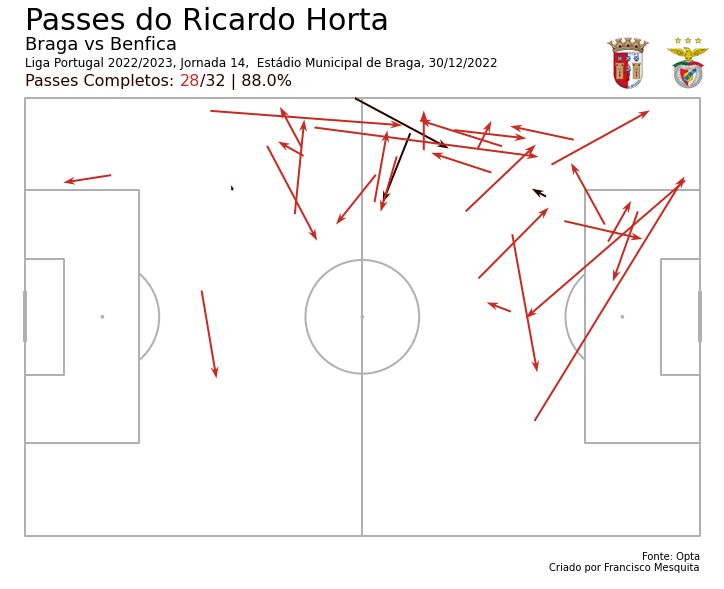

In [61]:
pitch = Pitch(pitch_type = 'opta')
fig, ax = pitch.grid(figheight = 8, title_height = 0.08, endnote_space = 0, axis = False, 
                      title_space = 0, grid_height = 0.82, endnote_height = 0.05)
fig.set_facecolor("white")

braga = pass_data[pass_data.team_name == data['home']['name']]
#city = pass_data[pass_data.team_name == data['away']['name']]
braga_succ = braga[braga.outcomeType_displayName == 'Successful']
braga_fail = braga[braga.outcomeType_displayName == 'Unsuccessful']

player1_succ = braga_succ[braga_succ.player_name == 'Ricardo Horta']
player1_fail = braga_fail[braga_fail.player_name == 'Ricardo Horta']

player1_succ_total = player1_succ[player1_succ.columns[0]].count() #number of successful passes
player1_fail_total = player1_fail[player1_fail.columns[0]].count() #number of unsuccessful passes
player1_total = player1_succ_total + player1_fail_total #number of total passes
player1_total_perc = round(100 * player1_succ_total/player1_total, 0)

pitch.arrows(player1_fail.x, player1_fail.y, player1_fail.endX, player1_fail.endY,  ax = ax['pitch'], color = '#2a0000', 
             width = 2, headwidth = 4, headlength = 6)
pitch.arrows(player1_succ.x, player1_succ.y, player1_succ.endX, player1_succ.endY,  ax = ax['pitch'], color = cHome, 
             width = 2, headwidth = 4, headlength = 6)

ax['title'].text(0, 1.3, 'Passes do Ricardo Horta', va = 'center', ha = 'left', fontsize = 30, color = 'black')
ax['title'].text(0, 0.8, data['home']['name'] + ' vs ' + data['away']['name'], 
                 va = 'center', ha = 'left', fontsize = 18, color = 'black')
ax['title'].text(0, 0.4, comp + ', ' + stage + ', ' + venue + ', ' + date, 
                 va = 'center', ha = 'left', fontsize = 12, color = 'black')
ax['title'].text(0, 0.0, 'Passes Completos: ', va = 'center', ha = 'left', fontsize = 16, color = '#2a0000')
ax['title'].text(0.23, 0.0, str(player1_succ_total), va = 'center', ha = 'left', fontsize = 16, color = cHome)
ax['title'].text(0.26, 0.0, '/' + str(player1_total) + ' | ' + str(player1_total_perc) + '%', 
                 va = 'center', ha = 'left', fontsize = 16, color = '#2a0000')
#ax['title'].text(0, 0.0, 'Successful Passes: ' + str(player1_succ_total) + '/' + str(player1_total) + ' | ' 
#                 + str(player1_total_perc) + '%', va = 'center', ha = 'left', fontsize = 16, color = 'pink')

add_image(Image.open(pHome), fig, 
          left = 0.82, bottom = 0.88, width = 0.07, height = 0.09)
add_image(Image.open(pAway), fig, 
          left = 0.9, bottom = 0.88, width = 0.07, height = 0.09)

ax['endnote'].text(1, 0.9, 'Fonte: Opta', va = 'center', ha = 'right', color = 'black')
ax['endnote'].text(1, 0.5, 'Criado por Francisco Mesquita', va = 'center', ha = 'right', color = 'black')

plt.show()

In [64]:
player1_MissedShots = MissedShots1[MissedShots1.player_name == 'Ricardo Horta']
player1_MissedShots_Total = player1_MissedShots[player1_MissedShots.columns[0]].count()
print(str(player1_MissedShots_Total) + ' Missed Shots (Off Target)')

player1_ShotOnPost = ShotOnPost1[ShotOnPost1.player_name == 'Ricardo Horta']
player1_ShotOnPost_Total = player1_ShotOnPost[player1_ShotOnPost.columns[0]].count()
print(str(player1_ShotOnPost_Total) + ' Shots on Post')

player1_SavedShot = SavedShot1[SavedShot1.player_name == 'Ricardo Horta']
player1_SavedShot_Total = player1_SavedShot[player1_SavedShot.columns[0]].count()
print(str(player1_SavedShot_Total) + ' Saved Shots')

player1_Goal = Goal1[Goal1.player_name == 'Ricardo Horta']
player1_Goal_Total = player1_Goal[player1_Goal.columns[0]].count()
print(str(player1_Goal_Total) + ' Goals')

1 Missed Shots (Off Target)
0 Shots on Post
0 Saved Shots
2 Goals


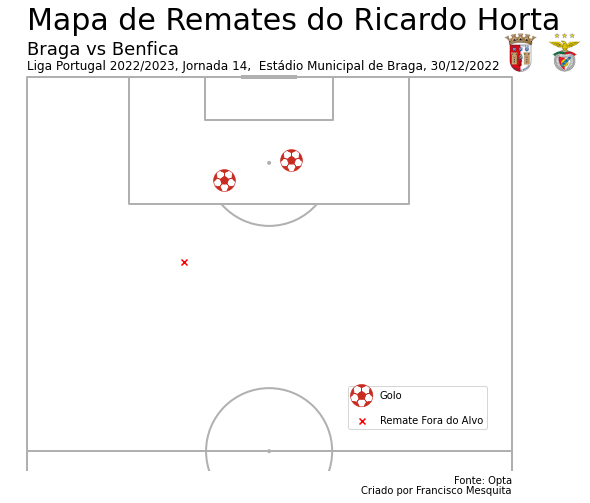

In [69]:
pitch = VerticalPitch(pitch_type = 'opta', half = True)
fig, axs = pitch.grid(figheight = 7, title_height = 0.08, endnote_space = 0, axis = False, 
                      title_space = 0, grid_height = 0.82, endnote_height = 0.05)
fig.set_facecolor("white")


pitch.scatter(player1_Goal.x, player1_Goal.y, edgecolors = cHome, linewidth = 0.6, c = 'white', 
             marker = 'football', ax = axs['pitch'], zorder = 2, label = 'Golo')

pitch.scatter(player1_MissedShots.x, player1_MissedShots.y, c = 'red', edgecolors = 'red',
              marker = 'x', ax = axs['pitch'], zorder = 2, label = 'Remate Fora do Alvo')


axs['title'].text(0, 0.9, 'Mapa de Remates do Ricardo Horta', va = 'center', ha = 'left', fontsize = 30, color = 'black')
axs['title'].text(0, 0.2, data['home']['name'] + ' vs ' + data['away']['name'], 
                  va = 'center', ha = 'left', fontsize = 18, color = 'black')
axs['title'].text(0, -0.2, comp + ', ' + stage + ', ' + venue + ', ' + date, 
                  va = 'center', ha = 'left', fontsize = 12, color = 'black')

# add a legend and title
legend = axs['pitch'].legend(loc = (0.65,.1), labelspacing = 1.5, fontsize = 10, labelcolor = 'black')

add_image(Image.open(pHome), fig, 
          left = 0.92, bottom = 0.86, width = 0.07, height = 0.09)
add_image(Image.open(pAway), fig, 
          left = 1., bottom = 0.86, width = 0.07, height = 0.09)

axs['endnote'].text(1, 0.6, 'Fonte: Opta', va = 'center', ha = 'right', color = 'black')
axs['endnote'].text(1, 0.2, 'Criado por Francisco Mesquita', va = 'center', ha = 'right', color = 'black')


#axs['title'].text(0.5, -6.7, "Man City: Shots: 18 | Shots on Target: 9 | xG: 1.8 | Goal: 3", 
#                 color = cHome, va = 'center', ha = 'center', fontsize = 18)

plt.show()

# André Horta

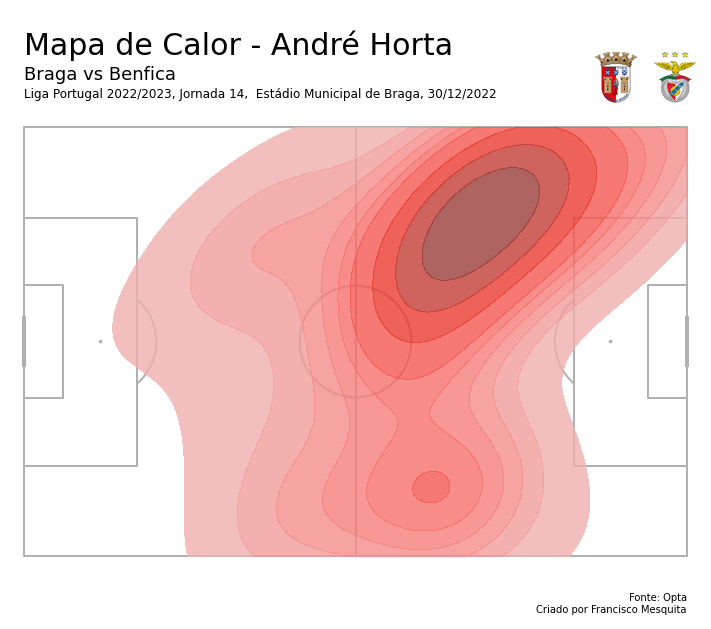

In [70]:
pitch = Pitch(pitch_type = 'opta')
fig, ax = pitch.grid(axis = False)
fig.set_facecolor("white")

player1 = touches_df[touches_df.player_name == 'André Horta']

pitch.kdeplot(player1.x, player1.y, shade = True, alpha = 0.8, ax = ax['pitch'], color = cHome)

ax['title'].text(0, 0.6, 'Mapa de Calor - André Horta', va = 'center', ha = 'left', fontsize=30, color = 'black')
ax['title'].text(0, 0.3, data['home']['name'] + ' vs ' + data['away']['name'], 
                 va = 'center', ha = 'left', fontsize = 18, color = 'black')
ax['title'].text(0, 0.1, comp + ', ' + stage + ', ' + venue + ', ' + date, 
                 va = 'center', ha = 'left', fontsize = 12, color = 'black')

add_image(Image.open(pHome), fig, 
          left = 0.82, bottom = 0.82, width = 0.07, height = 0.09)
add_image(Image.open(pAway), fig, 
          left = 0.9, bottom = 0.82, width = 0.07, height = 0.09)

ax['endnote'].text(1, 0.6, 'Fonte: Opta', va = 'center', ha = 'right', color = 'black')
ax['endnote'].text(1, 0.3, 'Criado por Francisco Mesquita', va = 'center', ha = 'right', color = 'black')

plt.show()

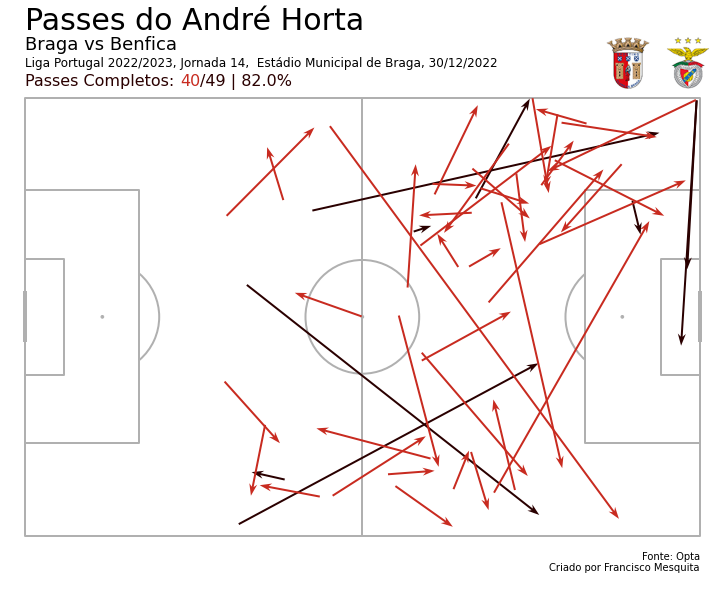

In [71]:
pitch = Pitch(pitch_type = 'opta')
fig, ax = pitch.grid(figheight = 8, title_height = 0.08, endnote_space = 0, axis = False, 
                      title_space = 0, grid_height = 0.82, endnote_height = 0.05)
fig.set_facecolor("white")

braga = pass_data[pass_data.team_name == data['home']['name']]
#city = pass_data[pass_data.team_name == data['away']['name']]
braga_succ = braga[braga.outcomeType_displayName == 'Successful']
braga_fail = braga[braga.outcomeType_displayName == 'Unsuccessful']

player1_succ = braga_succ[braga_succ.player_name == 'André Horta']
player1_fail = braga_fail[braga_fail.player_name == 'André Horta']

player1_succ_total = player1_succ[player1_succ.columns[0]].count() #number of successful passes
player1_fail_total = player1_fail[player1_fail.columns[0]].count() #number of unsuccessful passes
player1_total = player1_succ_total + player1_fail_total #number of total passes
player1_total_perc = round(100 * player1_succ_total/player1_total, 0)

pitch.arrows(player1_fail.x, player1_fail.y, player1_fail.endX, player1_fail.endY,  ax = ax['pitch'], color = '#2a0000', 
             width = 2, headwidth = 4, headlength = 6)
pitch.arrows(player1_succ.x, player1_succ.y, player1_succ.endX, player1_succ.endY,  ax = ax['pitch'], color = cHome, 
             width = 2, headwidth = 4, headlength = 6)

ax['title'].text(0, 1.3, 'Passes do André Horta', va = 'center', ha = 'left', fontsize = 30, color = 'black')
ax['title'].text(0, 0.8, data['home']['name'] + ' vs ' + data['away']['name'], 
                 va = 'center', ha = 'left', fontsize = 18, color = 'black')
ax['title'].text(0, 0.4, comp + ', ' + stage + ', ' + venue + ', ' + date, 
                 va = 'center', ha = 'left', fontsize = 12, color = 'black')
ax['title'].text(0, 0.0, 'Passes Completos: ', va = 'center', ha = 'left', fontsize = 16, color = '#2a0000')
ax['title'].text(0.23, 0.0, str(player1_succ_total), va = 'center', ha = 'left', fontsize = 16, color = cHome)
ax['title'].text(0.26, 0.0, '/' + str(player1_total) + ' | ' + str(player1_total_perc) + '%', 
                 va = 'center', ha = 'left', fontsize = 16, color = '#2a0000')
#ax['title'].text(0, 0.0, 'Successful Passes: ' + str(player1_succ_total) + '/' + str(player1_total) + ' | ' 
#                 + str(player1_total_perc) + '%', va = 'center', ha = 'left', fontsize = 16, color = 'pink')

add_image(Image.open(pHome), fig, 
          left = 0.82, bottom = 0.88, width = 0.07, height = 0.09)
add_image(Image.open(pAway), fig, 
          left = 0.9, bottom = 0.88, width = 0.07, height = 0.09)

ax['endnote'].text(1, 0.9, 'Fonte: Opta', va = 'center', ha = 'right', color = 'black')
ax['endnote'].text(1, 0.5, 'Criado por Francisco Mesquita', va = 'center', ha = 'right', color = 'black')

plt.show()

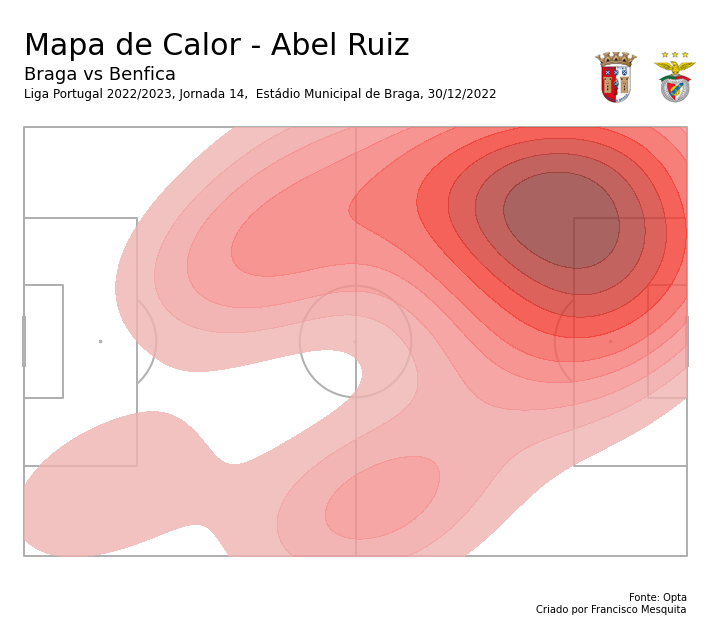

In [72]:
pitch = Pitch(pitch_type = 'opta')
fig, ax = pitch.grid(axis = False)
fig.set_facecolor("white")

player1 = touches_df[touches_df.player_name == 'Abel Ruiz']

pitch.kdeplot(player1.x, player1.y, shade = True, alpha = 0.8, ax = ax['pitch'], color = cHome)

ax['title'].text(0, 0.6, 'Mapa de Calor - Abel Ruiz', va = 'center', ha = 'left', fontsize=30, color = 'black')
ax['title'].text(0, 0.3, data['home']['name'] + ' vs ' + data['away']['name'], 
                 va = 'center', ha = 'left', fontsize = 18, color = 'black')
ax['title'].text(0, 0.1, comp + ', ' + stage + ', ' + venue + ', ' + date, 
                 va = 'center', ha = 'left', fontsize = 12, color = 'black')

add_image(Image.open(pHome), fig, 
          left = 0.82, bottom = 0.82, width = 0.07, height = 0.09)
add_image(Image.open(pAway), fig, 
          left = 0.9, bottom = 0.82, width = 0.07, height = 0.09)

ax['endnote'].text(1, 0.6, 'Fonte: Opta', va = 'center', ha = 'right', color = 'black')
ax['endnote'].text(1, 0.3, 'Criado por Francisco Mesquita', va = 'center', ha = 'right', color = 'black')

plt.show()

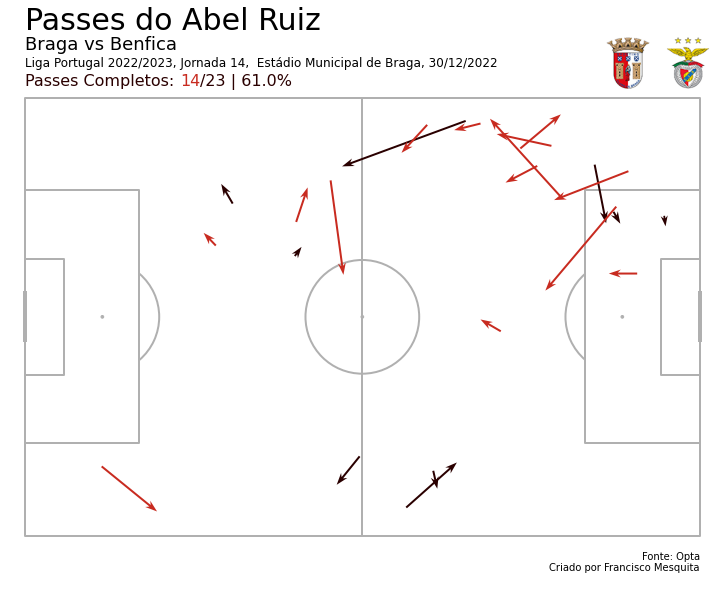

In [73]:
pitch = Pitch(pitch_type = 'opta')
fig, ax = pitch.grid(figheight = 8, title_height = 0.08, endnote_space = 0, axis = False, 
                      title_space = 0, grid_height = 0.82, endnote_height = 0.05)
fig.set_facecolor("white")

braga = pass_data[pass_data.team_name == data['home']['name']]
#city = pass_data[pass_data.team_name == data['away']['name']]
braga_succ = braga[braga.outcomeType_displayName == 'Successful']
braga_fail = braga[braga.outcomeType_displayName == 'Unsuccessful']

player1_succ = braga_succ[braga_succ.player_name == 'Abel Ruiz']
player1_fail = braga_fail[braga_fail.player_name == 'Abel Ruiz']

player1_succ_total = player1_succ[player1_succ.columns[0]].count() #number of successful passes
player1_fail_total = player1_fail[player1_fail.columns[0]].count() #number of unsuccessful passes
player1_total = player1_succ_total + player1_fail_total #number of total passes
player1_total_perc = round(100 * player1_succ_total/player1_total, 0)

pitch.arrows(player1_fail.x, player1_fail.y, player1_fail.endX, player1_fail.endY,  ax = ax['pitch'], color = '#2a0000', 
             width = 2, headwidth = 4, headlength = 6)
pitch.arrows(player1_succ.x, player1_succ.y, player1_succ.endX, player1_succ.endY,  ax = ax['pitch'], color = cHome, 
             width = 2, headwidth = 4, headlength = 6)

ax['title'].text(0, 1.3, 'Passes do Abel Ruiz', va = 'center', ha = 'left', fontsize = 30, color = 'black')
ax['title'].text(0, 0.8, data['home']['name'] + ' vs ' + data['away']['name'], 
                 va = 'center', ha = 'left', fontsize = 18, color = 'black')
ax['title'].text(0, 0.4, comp + ', ' + stage + ', ' + venue + ', ' + date, 
                 va = 'center', ha = 'left', fontsize = 12, color = 'black')
ax['title'].text(0, 0.0, 'Passes Completos: ', va = 'center', ha = 'left', fontsize = 16, color = '#2a0000')
ax['title'].text(0.23, 0.0, str(player1_succ_total), va = 'center', ha = 'left', fontsize = 16, color = cHome)
ax['title'].text(0.26, 0.0, '/' + str(player1_total) + ' | ' + str(player1_total_perc) + '%', 
                 va = 'center', ha = 'left', fontsize = 16, color = '#2a0000')
#ax['title'].text(0, 0.0, 'Successful Passes: ' + str(player1_succ_total) + '/' + str(player1_total) + ' | ' 
#                 + str(player1_total_perc) + '%', va = 'center', ha = 'left', fontsize = 16, color = 'pink')

add_image(Image.open(pHome), fig, 
          left = 0.82, bottom = 0.88, width = 0.07, height = 0.09)
add_image(Image.open(pAway), fig, 
          left = 0.9, bottom = 0.88, width = 0.07, height = 0.09)

ax['endnote'].text(1, 0.9, 'Fonte: Opta', va = 'center', ha = 'right', color = 'black')
ax['endnote'].text(1, 0.5, 'Criado por Francisco Mesquita', va = 'center', ha = 'right', color = 'black')

plt.show()

0 Missed Shots (Off Target)
0 Shots on Post
1 Saved Shots
1 Goals


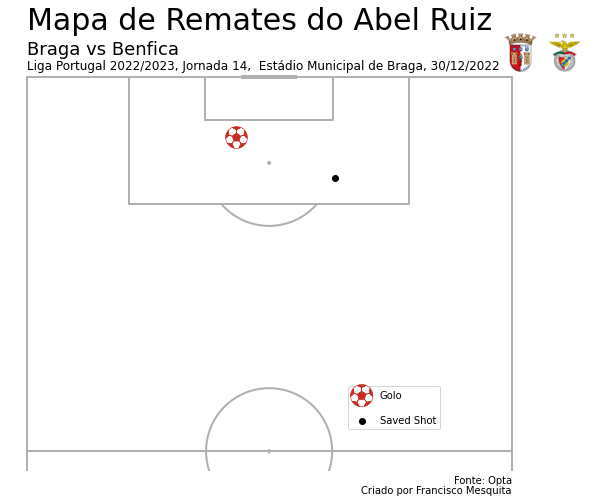

In [75]:
player1_MissedShots = MissedShots1[MissedShots1.player_name == 'Abel Ruiz']
player1_MissedShots_Total = player1_MissedShots[player1_MissedShots.columns[0]].count()
print(str(player1_MissedShots_Total) + ' Missed Shots (Off Target)')

player1_ShotOnPost = ShotOnPost1[ShotOnPost1.player_name == 'Abel Ruiz']
player1_ShotOnPost_Total = player1_ShotOnPost[player1_ShotOnPost.columns[0]].count()
print(str(player1_ShotOnPost_Total) + ' Shots on Post')

player1_SavedShot = SavedShot1[SavedShot1.player_name == 'Abel Ruiz']
player1_SavedShot_Total = player1_SavedShot[player1_SavedShot.columns[0]].count()
print(str(player1_SavedShot_Total) + ' Saved Shots')

player1_Goal = Goal1[Goal1.player_name == 'Abel Ruiz']
player1_Goal_Total = player1_Goal[player1_Goal.columns[0]].count()
print(str(player1_Goal_Total) + ' Goals')

pitch = VerticalPitch(pitch_type = 'opta', half = True)
fig, axs = pitch.grid(figheight = 7, title_height = 0.08, endnote_space = 0, axis = False, 
                      title_space = 0, grid_height = 0.82, endnote_height = 0.05)
fig.set_facecolor("white")


pitch.scatter(player1_Goal.x, player1_Goal.y, edgecolors = cHome, linewidth = 0.6, c = 'white', 
             marker = 'football', ax = axs['pitch'], zorder = 2, label = 'Golo')

pitch.scatter(player1_SavedShot.x, player1_SavedShot.y, c = 'black', edgecolors = 'black',
              marker = 'o', ax = axs['pitch'], zorder = 2, label = 'Saved Shot')


axs['title'].text(0, 0.9, 'Mapa de Remates do Abel Ruiz', va = 'center', ha = 'left', fontsize = 30, color = 'black')
axs['title'].text(0, 0.2, data['home']['name'] + ' vs ' + data['away']['name'], 
                  va = 'center', ha = 'left', fontsize = 18, color = 'black')
axs['title'].text(0, -0.2, comp + ', ' + stage + ', ' + venue + ', ' + date, 
                  va = 'center', ha = 'left', fontsize = 12, color = 'black')

# add a legend and title
legend = axs['pitch'].legend(loc = (0.65,.1), labelspacing = 1.5, fontsize = 10, labelcolor = 'black')

add_image(Image.open(pHome), fig, 
          left = 0.92, bottom = 0.86, width = 0.07, height = 0.09)
add_image(Image.open(pAway), fig, 
          left = 1., bottom = 0.86, width = 0.07, height = 0.09)

axs['endnote'].text(1, 0.6, 'Fonte: Opta', va = 'center', ha = 'right', color = 'black')
axs['endnote'].text(1, 0.2, 'Criado por Francisco Mesquita', va = 'center', ha = 'right', color = 'black')


#axs['title'].text(0.5, -6.7, "Man City: Shots: 18 | Shots on Target: 9 | xG: 1.8 | Goal: 3", 
#                 color = cHome, va = 'center', ha = 'center', fontsize = 18)

plt.show()

In [77]:
player2_Clear = Clearance[Clearance.player_name == 'Uros Racic']
player2_Clear_Total = player2_Clear[player2_Clear.columns[0]].count()
print(str(player2_Clear_Total) + ' Clearances')

player2_Intercep = Interception[Interception.player_name == 'Uros Racic']
player2_Intercep_Total = player2_Intercep[player2_Intercep.columns[0]].count()
print(str(player2_Intercep_Total) + ' Interceptions')

player2_BlockPass = BlockedPass[BlockedPass.player_name == 'Uros Racic']
player2_BlockPass_Total = player2_BlockPass[player2_BlockPass.columns[0]].count()
print(str(player2_BlockPass_Total) + ' Blocked Passes')

player2_Tackle = Tackle[Tackle.player_name == 'Uros Racic']
player2_Tackle_Total = player2_Tackle[player2_Tackle.columns[0]].count()
print(str(player2_Tackle_Total) + ' Tackles')

player2_BallRecover = BallRecovery[BallRecovery.player_name == 'Uros Racic']
player2_BallRecover_Total = player2_BallRecover[player2_BallRecover.columns[0]].count()
print(str(player2_BallRecover_Total) + ' Ball Recoveries')

AerialWon
player2_AerialWon = AerialWon[AerialWon.player_name == 'Uros Racic']
player2_AerialWon_Total = player2_AerialWon[player2_AerialWon.columns[0]].count()
print(str(player2_AerialWon_Total) + ' Aerial Duels Won')

1 Clearances
2 Interceptions
0 Blocked Passes
3 Tackles
0 Ball Recoveries
1 Aerial Duels Won


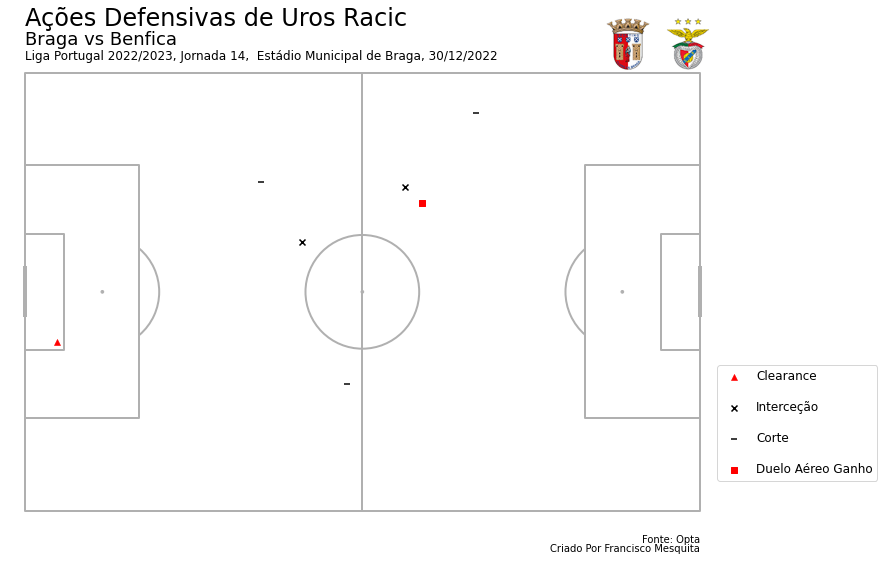

In [78]:
pitch = Pitch(pitch_type = 'opta')
fig, axs = pitch.grid(figheight = 8, title_height = 0.08, endnote_space = 0, axis = False, 
                      title_space = 0, grid_height = 0.82, endnote_height = 0.05)
fig.set_facecolor("white")

#pitch.scatter(player2_BallRecover.x, player2_BallRecover.y, c = 'grey', edgecolors = 'grey',
#              marker = 'D', ax = axs['pitch'], zorder = 2, label = 'Ball Recovery')

pitch.scatter(player2_Clear.x, player2_Clear.y, edgecolors = 'red', linewidth = 0.6, c = 'red', 
             marker = '^', ax = axs['pitch'], zorder = 2, label = 'Clearance')

pitch.scatter(player2_Intercep.x, player2_Intercep.y, c = 'black', edgecolors = 'black',
              marker = 'x', ax = axs['pitch'], zorder = 2, label = 'Interceção')

#pitch.scatter(player2_BlockPass.x, player2_BlockPass.y, c = 'red', edgecolors = 'red',
#              marker = 'o', ax = axs['pitch'], zorder = 2, label = 'Blocked Pass')

pitch.scatter(player2_Tackle.x, player2_Tackle.y, c = 'black', edgecolors = 'black',
              marker = '_', ax = axs['pitch'], zorder = 2, label = 'Corte')

pitch.scatter(player2_AerialWon.x, player2_AerialWon.y, c = 'red', edgecolors = 'red',
              marker = 's', ax = axs['pitch'], zorder = 2, label = 'Duelo Aéreo Ganho')

axs['title'].text(0, 0.8, 'Ações Defensivas de Uros Racic', va = 'center', ha = 'left', fontsize = 24, color = 'black')
axs['title'].text(0, 0.35, data['home']['name'] + ' vs ' + data['away']['name'], 
                  va = 'center', ha = 'left', fontsize = 18, color = 'black')
axs['title'].text(0, 0., comp + ', ' + stage + ', ' + venue + ', ' + date, 
                  va = 'center', ha = 'left', fontsize = 12, color = 'black')

# add a legend and title
legend = axs['pitch'].legend(loc = (1.,.1), labelspacing = 1.5, fontsize = 12, labelcolor = 'black')

add_image(Image.open(pHome), fig, 
          left = 0.82, bottom = 0.87, width = 0.07, height = 0.09)
add_image(Image.open(pAway), fig, 
          left = 0.9, bottom = 0.87, width = 0.07, height = 0.09)

axs['endnote'].text(1, 0.6, 'Fonte: Opta', va = 'center', ha = 'right', color = 'black')
axs['endnote'].text(1, 0.3, 'Criado Por Francisco Mesquita', va = 'center', ha = 'right', color = 'black')

plt.show()

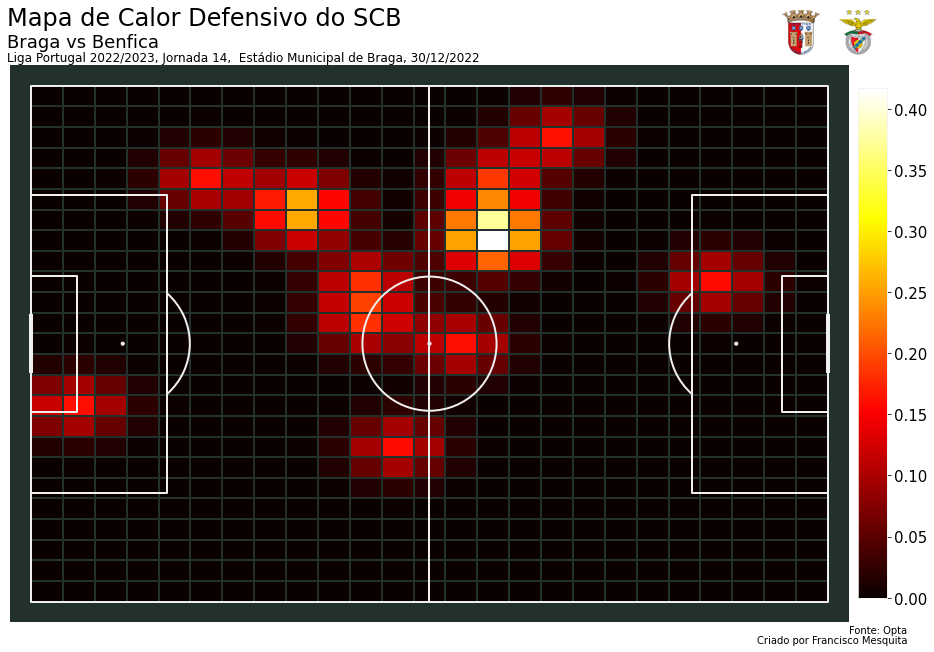

In [79]:
pitch = Pitch(pitch_type = 'opta', line_zorder = 2, pitch_color = '#22312b', line_color = '#efefef')
fig, axs = pitch.grid(endnote_height = 0.03, endnote_space = 0, grid_width = 0.88, left = 0.025,
                      title_height = 0.06, title_space = 0, axis = False, grid_height = 0.86)
fig.set_facecolor('white')

home = df_def[df_def.player_name == 'Uros Racic']
#away = df_def[df_def.team_name == data['away']['name']]

# plot heatmap
bin_statistic = pitch.bin_statistic(home.x, home.y, statistic = 'count', bins = (25, 25))
bin_statistic['statistic'] = gaussian_filter(bin_statistic['statistic'], 1)
pcm = pitch.heatmap(bin_statistic, ax = axs['pitch'], cmap = 'hot', edgecolors = '#22312b')

# add cbar
ax_cbar = fig.add_axes((0.915, 0.093, 0.03, 0.786))
cbar = plt.colorbar(pcm, cax = ax_cbar)
cbar.outline.set_edgecolor('#efefef')
cbar.ax.yaxis.set_tick_params(color = 'black')
plt.setp(plt.getp(cbar.ax.axes, 'yticklabels'), color = 'black')
for label in cbar.ax.get_yticklabels():
    label.set_fontsize(15)

axs['title'].text(-0.03, 1.2, 'Mapa de Calor Defensivo do Uros Racic', 
#axs['title'].text(-0.03, 1.2, 'Defensive Heat Map by ' + data['away']['name'], 
                  va = 'center', ha = 'left', fontsize = 24, color = 'black')
axs['title'].text(-0.03, 0.6, data['home']['name'] + ' vs ' + data['away']['name'], 
                  va = 'center', ha = 'left', fontsize = 18, color = 'black')
axs['title'].text(-0.03, 0.2, comp + ', ' + stage + ', ' + venue + ', ' + date, 
                  va = 'center', ha = 'left', fontsize = 12, color = 'black')    
    
# Home
add_image(Image.open(pHome), fig, 
          left = 0.82, bottom = 0.93, width = 0.07, height = 0.07)
# Away
add_image(Image.open(pAway), fig, 
          left = 0.88, bottom = 0.93, width = 0.07, height = 0.07)

axs['endnote'].text(1.1, .6, 'Fonte: Opta', va = 'center', ha = 'right', color = 'black')
axs['endnote'].text(1.1, .1, 'Criado por Francisco Mesquita', va = 'center', ha = 'right', color = 'black')

plt.show()

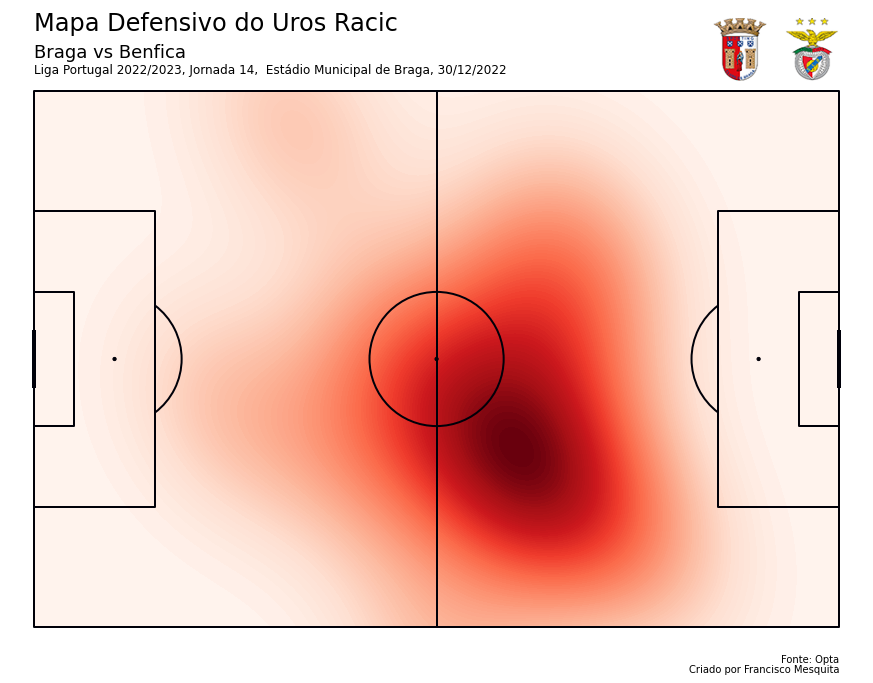

In [82]:
fig, axs = pitch.grid(figheight = 10, title_height = 0.08, endnote_space = 0, title_space = 0,
                      axis = False, grid_height = 0.82, endnote_height = 0.03)
fig.set_facecolor('white')

pitch = Pitch(line_color = '#000009', line_zorder = 1)

home = df_def[df_def.player_name == 'Uros Racic']
#city = df_def[df_def.team_name == data['away']['name']]

kde_HD = pitch.kdeplot(home.y, home.x, ax = axs['pitch'], shade = True, levels = 100, 
                       shade_lowest = True, cut = 4, cmap = 'Reds')

axs['title'].text(0, 0.7, 'Mapa Defensivo do Uros Racic', 
#axs['title'].text(0, 0.7, 'Defensive Heat Map by ' + data['away']['name'],  
                  va = 'center', ha = 'left', fontsize = 24, color = 'black')
axs['title'].text(0, 0.2, data['home']['name'] + ' vs ' + data['away']['name'], 
                  va = 'center', ha = 'left', fontsize = 18, color = 'black')
axs['title'].text(0, -0.1, comp + ', ' + stage + ', ' + venue + ', ' + date, 
                  va = 'center', ha = 'left', fontsize = 12, color = 'black')


axs['endnote'].text(1, 0.8, 'Fonte: Opta', va = 'center', ha = 'right', color = 'black')
axs['endnote'].text(1, 0.3, 'Criado por Francisco Mesquita', va = 'center', ha = 'right', color = 'black')

add_image(Image.open(pHome), fig, 
          left = 0.8, bottom = 0.86, width = 0.07, height = 0.09)
add_image(Image.open(pAway), fig, 
          left = 0.88, bottom = 0.86, width = 0.07, height = 0.09)

plt.show()